**TSA Claims Database**<br><br>
Created by: 
Noor Kharismawan Akbar (JCDSOL-009-038)

<hr>

# **A. Background**

[Transportation Security Administration (TSA)](https://en.wikipedia.org/wiki/Transportation_Security_Administration) adalah sebuah badan dari Department of Homeland Security (DHS) Amerika Serikat yang memiliki wewenang atas keamanan sistem transportasi di dalam dan luar Amerika Serikat. TSA dibentuk untuk menjaga keamanan bandara komersil dan bagasi. TSA memiliki standar yang tinggi dalam hal keamanan. Semua penumpang pesawat terbang akan diperiksa terlebih dahulu oleh agen TSA memasuki pesawat.

Tahukah Anda bahwa klaim dapat diajukan terhadap TSA? Terkadang TSA membuat kesalahan. Orang bisa terluka dan harta benda bisa rusak, hilang, atau dicuri. Klaim umumnya diajukan terhadap TSA untuk cedera pribadi dan properti yang hilang atau rusak selama pemeriksaan dan mereka mencatat setiap klaim.

<hr>

# **B. Problem Statement**

Jika klaim yang diajukan tergolong tinggi, TSA pastinya akan banyak mengalami kerugian (walaupun TSA sendiri merupakan badan pemerintahan). Jumlah claim yang tinggi ke TSA akan berdampak pada biaya yang harus dikeluarkan untuk ganti rugi, yang pastinya lebih tinggi juga.

Oleh karena itu, pada analisis ini kita akan mencoba menganalisis data untuk menjawab pertanyaan-pertanyaan ini:
* Bagaimana karakteristik insiden yang diajukan terhadap TSA?
* Bagaimana karakteristik klaim yang memiliki nilai klaim yang lebih tinggi?
* Apakah ada faktor lain seperti error sistem yang mempengaruhi data pada sistem?

<hr>

# **C. Data**

Untuk menyelesaikan permasalahan ini, Digunakan dataset `tsa_claims.csv` yang berasal dari **Kaggle**. Dataset ini dapat diunduh [di laman ini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database). Berikut dibawah ini merupakan deskripsi kolom.

| Nama Kolom | Deskripsi Kolom
|---|---
| Claim Number  | ID setiap klaim
| Date Received | Tanggal ketika laporan diterima
| Incident Date | Tanggal ketika insiden terjadi
| Airport Code  | Kode bandara
| Airport Name	| Nama bandara
| Airline Name  | Nama pesawat
| Claim Type	| Tipe klaim yang diajukan
| Claim Site	| Tempat terjadinya insiden
| Item	        | Barang yang di klaim
| Claim Amount	| Nilai klaim yang diajukan oleh korban
| Status	    | Status klaim
| Close Amount	| Nilai klaim yang dibayarkan oleh TSA
| Disposition   | Status klaim terakhir

<hr>

## **C.1 Import Libraries & Load Dataset**

Import Libraries yang dibutuhkan dalam notebook ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as mn

from scipy.stats import f_oneway, wilcoxon

pd.set_option('display.max_colwidth', None)

Load Dataset Original.

In [2]:
raw_data = pd.read_csv('tsa_claims.csv')
df = raw_data.copy()
df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18428\1881573368.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Kita akan menyeragamkan tipe data ke `object` karena terdapat mixed dtype pada kolom 0, 11, dan 12. Jika tidak ditangani, data tersebut akan hilang ketika penghapusan whitespace. Sekalian kita juga akan membuat copy dari dataset asli.

In [3]:
df = pd.read_csv('tsa_claims.csv', dtype = 'object')
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


<hr>

## **C.2 Data Understanding**

### C.2.a Informasi Dataset

Untuk mengetahui indeks kolom, nama kolom, jumlah non-null value, dan datatype.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


Dari informasi diatas bisa terlihat bahwa dataset terdiri dari **204.267 baris** & **13 kolom**. Terlihat juga, selain kolom `Claim Number`, terdapat beberapa missing value. Semua tipe data yang ada berbentuk `object`.

### C.2.b Statistik Data

Berikut ringkasan statistik dari setiap kolom pada dataset.

In [5]:
df.describe().T

,count,unique,top,freq
Claim Number,204267,204244,2013123010324,2
Date Received,204004,4007,5-Dec-03,682
Incident Date,202084,26807,12/27/2004 0:00,144
Airport Code,195743,465,LAX,9596
Airport Name,195743,485,John F. Kennedy International,9232
Airline Name,169893,318,American Airlines,17553
Claim Type,196354,11,Passenger Property Loss,117868
Claim Site,203527,6,Checked Baggage,159753
Item,200301,4704,Other,36908
Claim Amount,200224,36117,$0.00,28445


Bisa terlihat dari deskripsi statistik diatas, meskipun seluruh kolom berbentuk `object` namun ada beberapa kolom yang seharusnya bukan bertipe `object` seperti:
* Date Received	& Incident Date	-> seharusnya bertipe `datetime`
* Claim Amount & Close Amount -> seharusnya bertipe `float`

In [6]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

Nama Kolom  Jumlah Unique Value  \
0    Claim Number               204244   
1   Date Received                 4007   
2   Incident Date                26807   
3    Airport Code                  465   
4    Airport Name                  485   
5    Airline Name                  318   
6      Claim Type                   11   
7      Claim Site                    6   
8            Item                 4704   
9    Claim Amount                36117   
10         Status                   15   
11   Close Amount                17162   
12    Disposition                    3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [7]:
df['Item'].nunique()

4704

Dari paparan unique data diatas, bisa terlihat:
- Terdapat missing values tersembunyi yaitu `-` yang terlihat pada `Claim Type` & `Claim Site`
- Kolom `Claim Number`, yang merupakan ID setiap klaim (yang seharusnya unique), memiliki beberapa nilai duplikat. Namun kolom ini akan diabaikan dalam analisis ini.
- Kolom `Item` terdapat unique values yang berulang.
- Kolom `Status` ada beberapa values yang artinya sama namun hanya berbeda penulisan, seperti:
    * `Approved` & `Approve in Full`
    * `Settled` & `Settle`
    * `Denied` & `Deny`

### C.2.f Data Duplikat

Langkah terakhir dalam data understanding, kita cek **Data duplikat**

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN


Terdapat 1 data duplikat.

<hr>

## **C.3 Data Cleaning**

### C.3.a Menghapus Whitespace

Untuk menghapus whitespace, digunakan fungsi [strip()](https://flexiple.com/python/python-trim/).

In [10]:
df = df.apply(lambda x: x.str.strip())

### C.3.b Menghapus Data Duplikat

#### 1. Duplikat Seluruh Kolom

Kita akan menghapus baris yang memiliki data duplikat pada seluruh kolom menggunakan [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html), dimana kita akan keep baris pertama nya.

In [11]:
df.shape

(204267, 13)

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape

(204266, 13)

In [14]:
df.duplicated().sum()

0

#### 2. Duplikat di kolom `Claim Number`

Kemudian kita juga akan menghapus `Claim Number, yang dimana merupakan id unik setiap klaim, yang memiliki nilai duplikat.

In [15]:
df['Claim Number'].duplicated().sum()

22

In [16]:
df[df['Claim Number'].duplicated(keep=False)].sort_values('Claim Number').head(6)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
180323,2013050203487,1-May-13,1/21/2013 0:00,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,-,-,-,NaN,NaN
196321,2013050203487,27-Feb-15,21-Jan-13,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,-,$0.00,Deny,NaN,NaN
180324,2013050603513,1-May-13,3/1/2013 21:40,ZZZ,Unspecified Personal Injury,Delta Air Lines,Personal Injury,Checkpoint,-,-,-,NaN,NaN
203532,2013050603513,27-Feb-15,1-Mar-13,SFO,San Francisco International,Delta Air Lines,Personal Injury,Checkpoint,-,-,-,NaN,NaN
179950,2013051603705,16-Apr-13,3/30/2013 12:00,HXD,Hilton Head Island Airport,USAir,Personal Injury,Checkpoint,Other,-,-,NaN,NaN
198611,2013051603705,16-Mar-15,30-Mar-13,HXD,Hilton Head Island Airport,USAir,Personal Injury,Checkpoint,Other,$0.00,Deny,NaN,NaN


Terdapat masing-masing 2 nilai duplikat. Kita akan mendrop baris duplikat (dengan tetap keep `Date Received` yang paling akhir).

In [17]:
df = df.sort_values('Date Received').drop_duplicates(subset='Claim Number', keep='last')

In [18]:
df['Claim Number'].duplicated().sum()

0

### C.3.c Handle Missing Values

#### General Cleaning

Seperti yang telah dibahas di overview data, terdapat missing value berupa `-` yang akan kita replace agar nilai nya sama seperti missing values lain.

In [19]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72885,35.685259
1,Close Amount,68929,33.748360
2,Airline Name,34373,16.829381
3,Airport Code,8523,4.172950
4,Airport Name,8523,4.172950
5,Claim Type,7913,3.874288
6,Claim Amount,4043,1.979495
7,Item,3966,1.941795
8,Incident Date,2183,1.068820
9,Claim Site,740,0.362312


In [20]:
df = df.replace('-', np.nan)

In [21]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72885,35.685259
1,Close Amount,68929,33.748360
2,Airline Name,38612,18.904839
3,Claim Amount,16778,8.214684
4,Status,12740,6.237637
5,Airport Code,8964,4.388868
6,Airport Name,8964,4.388868
7,Item,8375,4.100488
8,Claim Type,8195,4.012358
9,Incident Date,2183,1.068820


Terlihat missing values bertambah untuk kolom:
* `Airline Name`
* `Airport Code`
* `Airport Name`
* `Claim Type`
* `Claim Amount`
* `Item`
* `Claim Site`
* `Status`

Untuk menghandle missing value pada dataset ini, berdasarkan artikel ["A Guide to Handling Missing values in Python"](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) dari Kaggle, akan dilakukan:
* Peninjauan letak & persebaran baris yang memiliki missing value menggunakan Matriks
* Analisis korelasi missing value menggunakan Heatmap
* Analisis clustering menggunakan [Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)

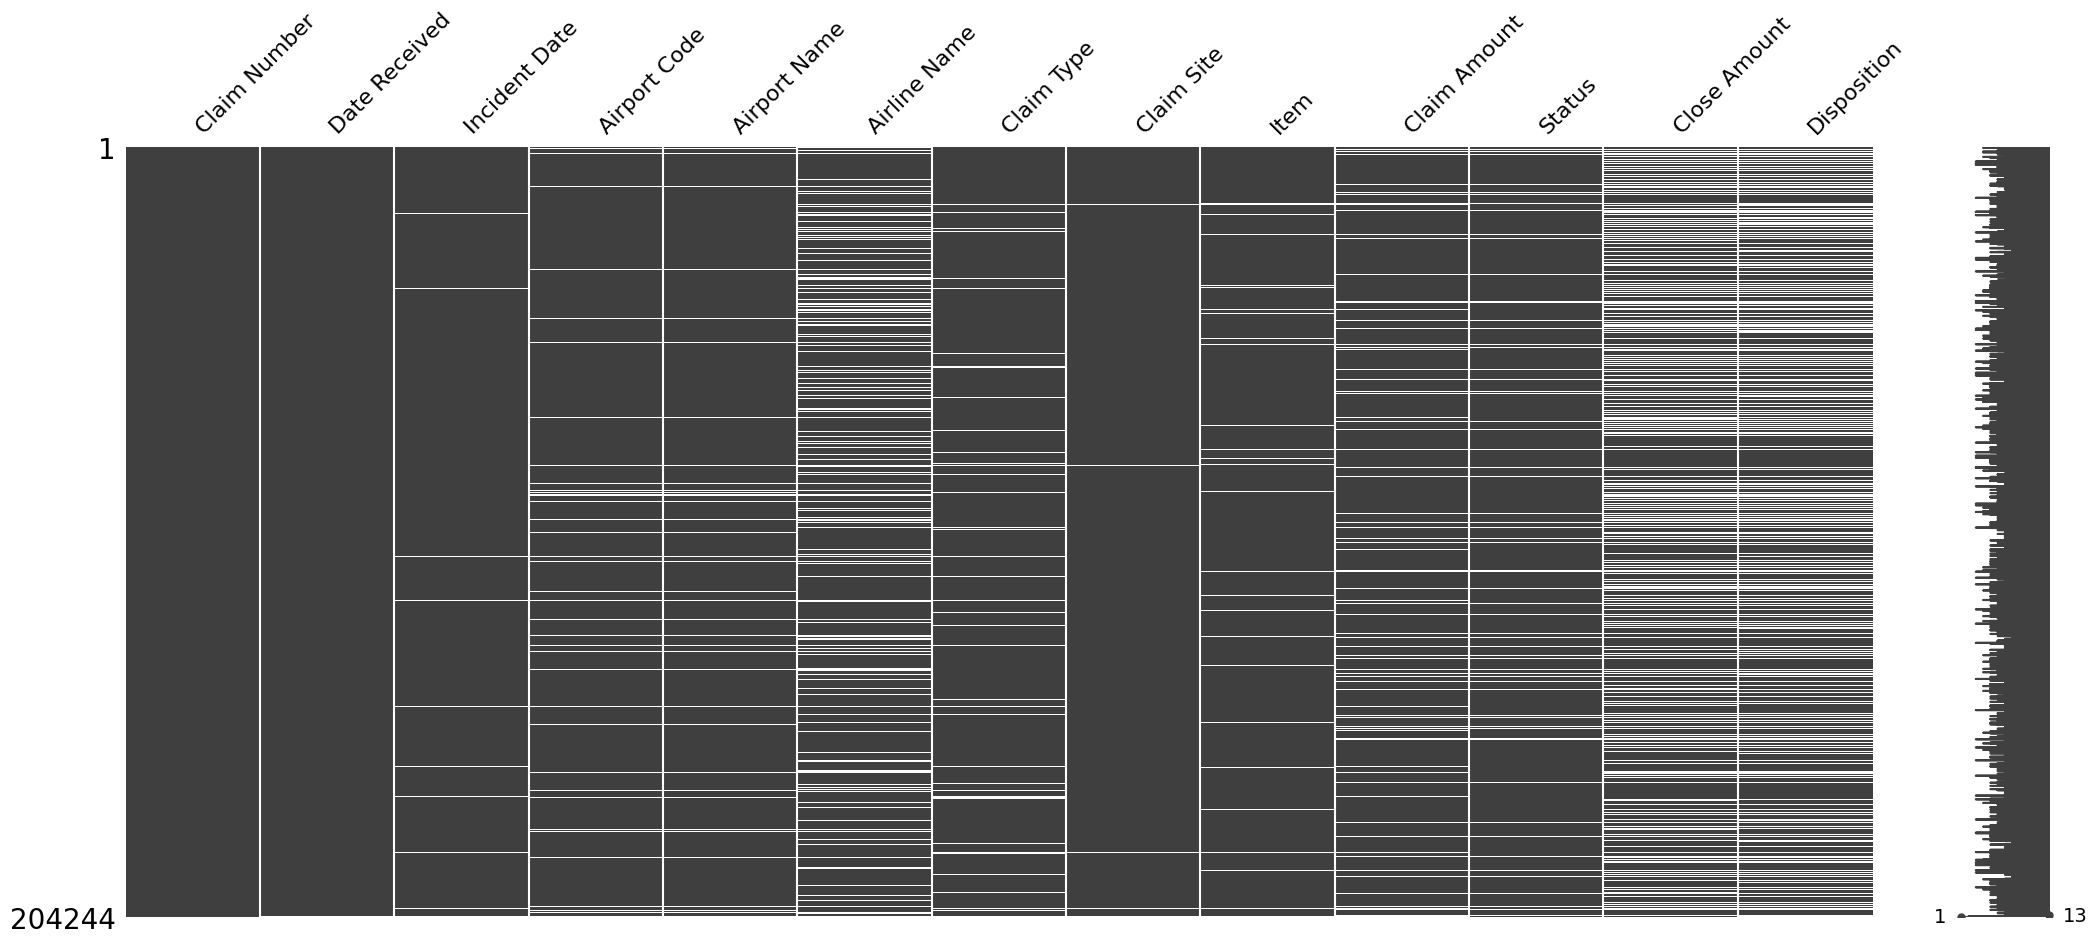

In [22]:
mn.matrix(df)
plt.show()

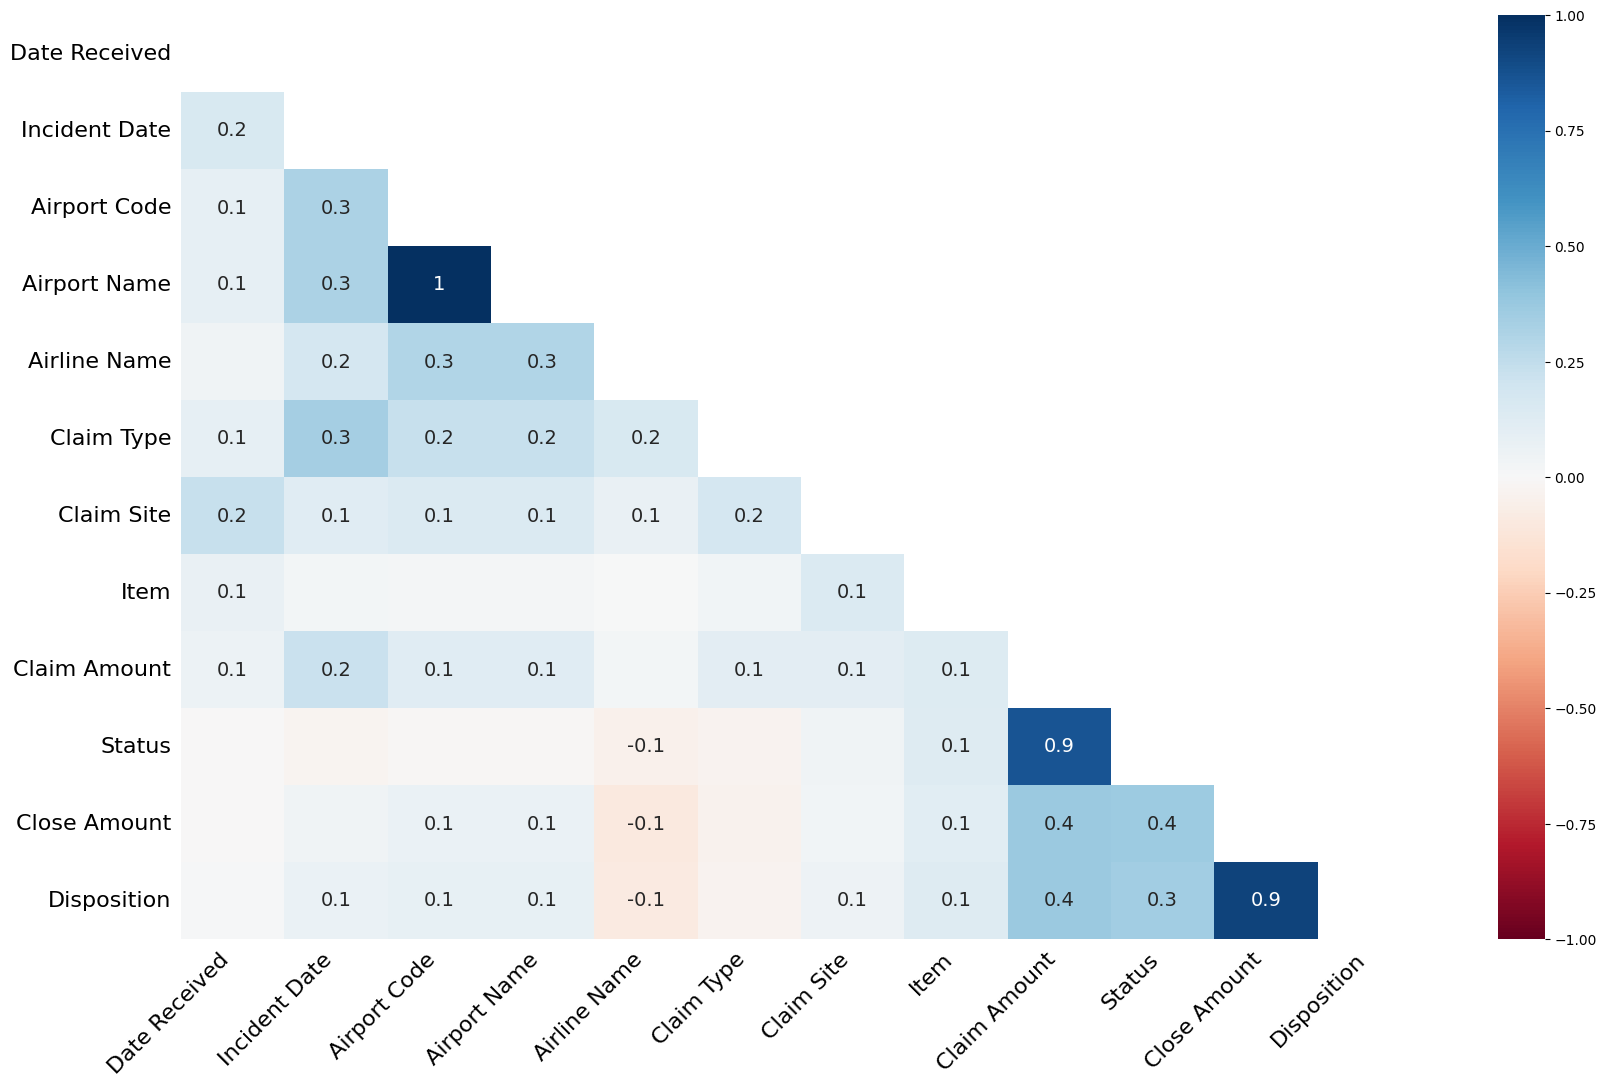

In [23]:
mn.heatmap(df)
plt.show()

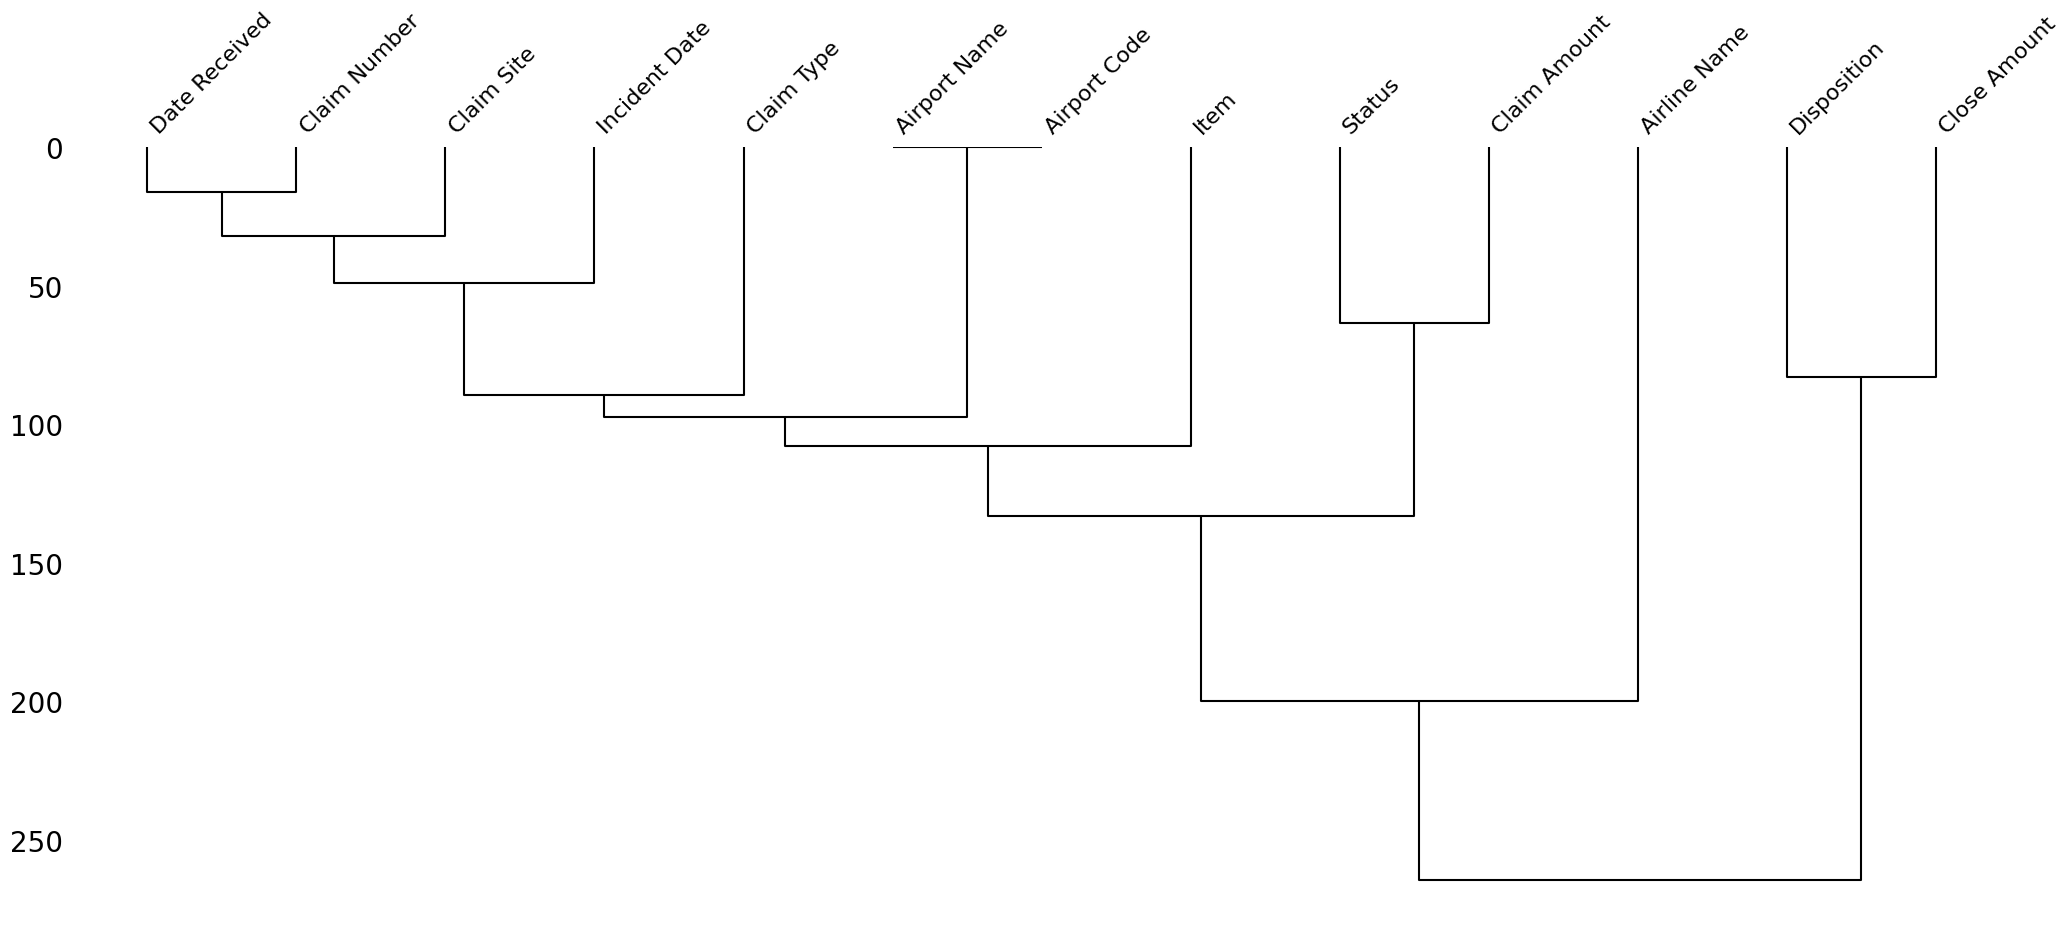

In [24]:
mn.dendrogram(df)
plt.show()

Analisis missing values:
* Terlihat missing value tersebar di beberapa kolom yang sama seperti data pada tabel
* Dalam satu baris yang sama, juga ada beberapa kolom yang kosong
* Kolom `Disposition`, `Close Amount`, dan `Airline Name` memiliki missing values cukup tersebar
* Kolom `Status` & `Claim Amount` memiliki korelasi missing value yang tinggi (0.9), dimana kedua kolom tersebut memiliki missing values yang cukup tersebar
* Kolom `Close Amount` & `Disposition` memiliki korelasi missing value yang tinggi (0.9), dimana kedua kolom tersebut memiliki missing values  yang cukup tersebar juga
* Kolom `Airport Code` & `Airport Name` memiliki korelasi missing value dengan nilai 1, dimana kedua kolom tersebut memiliki missing value dengan jumlah & letak yang sama persis
* Kolom lain, memiliki korelasi antar kolom yang cukup rendah

Untuk mengatasi banyaknya kolom kosong yang terdapat pada satu baris, kita akan melakukan drop baris yang memiliki **kurang dari 5 non-null value**.

In [25]:
thresh = 5

miss_val = len(df.columns) - thresh
miss_val_count = (df.isna().sum(axis=1) > miss_val).value_counts()

if len(miss_val_count)>1:
    print(f'Jumlah kolom dengan non-null values kurang dari 5: {miss_val_count[True]}')
else:
    print(f'Jumlah kolom dengan non-null values kurang dari 5: 0')

Jumlah kolom dengan non-null values kurang dari 5: 256


In [26]:
df.shape

(204244, 13)

In [27]:
df = df.dropna(axis=0,thresh=5)

In [28]:
thresh = 5

miss_val = len(df.columns) - thresh
miss_val_count = (df.isna().sum(axis=1) > miss_val).value_counts()

if len(miss_val_count)>1:
    print(f'Jumlah kolom dengan non-null values kurang dari 5: {miss_val_count[True]}')
else:
    print(f'Jumlah kolom dengan non-null values kurang dari 5: 0')

Jumlah kolom dengan non-null values kurang dari 5: 0


In [29]:
df.shape

(203988, 13)

#### Pengisian Missing Values per kolom

Selanjutnya akan dilanjutkan peninjauan missing values per kolom, yang akan dilakukan sesuai urutan kolom dalam df.

In [30]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4416,0401107L,1-Apr-03,2/20/2003 0:00,PHX,Phoenix Sky Harbor International,NaN,NaN,Checked Baggage,Locks,$20.00,Approved,$20.00,Approve in Full
4481,0401004L,1-Apr-03,11/29/2002 0:00,RSW,Southwest Florida International,NaN,Property Damage,Checkpoint,Cameras - Digital,$120.00,Settled,$40.00,Settle
4479,0401002L,1-Apr-03,2/16/2003 0:00,LGA,LaGuardia,NaN,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$550.00,Settled,$275.00,Settle
4478,0401128L,1-Apr-03,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,1-Apr-03,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


Rangkuman pengisian missing values:
| Kolom | Keterangan 
|---|---|
| Claim Number  | -
| Date Received | Median jarak tanggal dengan Incident Date
| Incident Date | Median jarak tanggal dengan Date Received
| Airport Code  | 1. Mengisi dengan modus `Claim Site`, <br>2. Jika kolom `Claim Site` kosong, kita akan isi dengan modus `Claim Type`, <br>3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan
| Airport Name	| 1. Mengisi dengan modus `Claim Site`, <br>2. Jika kolom `Claim Site` kosong, kita akan isi dengan modus `Claim Type`, <br>3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan
| Airline Name  | 1. Diisi dengan modus Airport Code
| Claim Type	| Diisi berdasarkan **modus** `Airport Code` nya.
| Claim Site	| Diisi berdasarkan **modus** `Claim Type` nya.
| Item	        | Modus per Item
| Claim Amount	| 1. Mengisi median `Claim Amount` berdasarkan `Item`, <br>2. Jika kolom `Item` tidak memiliki value `Claim Amount` sama sekali, kita akan isi dengan median `Claim Amount` berdasarkan kolom `Claim Type`, <br>3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan
| Status	    | diisi dengan `Not Available`
| Close Amount	| 1. Jika `Disposition` memiliki value `Approve in Full`, diasumsikan bahwa nilai `Close Amount` sama dengan `Claim Amount`. <br>2. Jika `Disposition` memiliki value `Deny`, diasumsikan bahwa nilai `Close Amount` sama dengan 0. <br>3. Jika `Disposition` memiliki value `Settle`, nilai `Close Amount` akan ditinjau antara perbandingan `Close Amount` dan `Claim Amount`
| Disposition   | diisi dengan `Not Available`

##### `Date Received` & `Incident Date`

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203988 entries, 4416 to 97230
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   203988 non-null  object
 1   Date Received  203853 non-null  object
 2   Incident Date  201949 non-null  object
 3   Airport Code   195280 non-null  object
 4   Airport Name   195280 non-null  object
 5   Airline Name   165626 non-null  object
 6   Claim Type     196037 non-null  object
 7   Claim Site     203217 non-null  object
 8   Item           195846 non-null  object
 9   Claim Amount   187462 non-null  object
 10  Status         191337 non-null  object
 11  Close Amount   135227 non-null  object
 12  Disposition    131354 non-null  object
dtypes: object(13)
memory usage: 21.8+ MB


In [32]:
def date_format(x):
    list_hari = x.split('/')

    list_bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    hari = list_hari[1] 
    bulan = list_bulan[int(list_hari[0])-1]
    tahun = list_hari[2][2:4]
    
    format_baru = f'{hari}-{bulan}-{tahun}'

    return format_baru

In [33]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

In [34]:
# df.drop(df[df['Date Received'] > '31/12/2015'].index, inplace=True)
# df.drop(df[df['Date Received'] < '01/01/2002'].index, inplace=True)

In [35]:
df[['Date Received', 'Incident Date']].isna().sum()

Date Received     135
Incident Date    2039
dtype: int64

In [36]:
df['Incident Date'].value_counts()

12/27/2004 0:00    144
12/26/2004 0:00    142
12/29/2003 0:00    138
1/4/2004 0:00      136
12/28/2003 0:00    131
                  ... 
4/15/2012 17:00      1
4/5/2012 15:55       1
1/24/2012 6:30       1
3/29/2011 7:05       1
5/2/2002 0:00        1
Name: Incident Date, Length: 26786, dtype: int64

In [37]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')

In [38]:
df['Incident Date'].value_counts()

2004-12-27 00:00:00    144
2004-12-26 00:00:00    142
2003-12-29 00:00:00    138
2004-01-04 00:00:00    136
2003-12-28 00:00:00    131
                      ... 
2010-10-08 06:00:00      1
2010-09-30 11:00:00      1
2010-10-12 18:00:00      1
2009-09-09 07:30:00      1
2002-05-02 00:00:00      1
Name: Incident Date, Length: 26341, dtype: int64

In [39]:
# df.drop(df[df['Incident Date'] > '31/12/2015'].index, inplace=True)
# df.drop(df[df['Incident Date'] < '01/01/2002'].index, inplace=True)

In [40]:
df[['Date Received', 'Incident Date']].isna().sum()

Date Received     135
Incident Date    2203
dtype: int64

In [41]:
df.loc[df['Incident Date'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4478,0401128L,2003-04-01,NaT,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,NaT,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,NaT,NaN,NaN,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,NaT,NaN,NaN,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,NaT,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97164,0702503M,NaT,NaT,NaN,NaN,NaN,NaN,Other,Computer - Laptop,NaN,Denied,$0.00,Deny
97165,0702529M,NaT,NaT,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,$0.00,Deny
97189,0909811M,NaT,NaT,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$75.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
97194,0909823M,NaT,NaT,NaN,NaN,Delta Air Lines,Property Damage,Other,Luggage (all types including footlockers),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


Text(0.5, 0, 'Year')

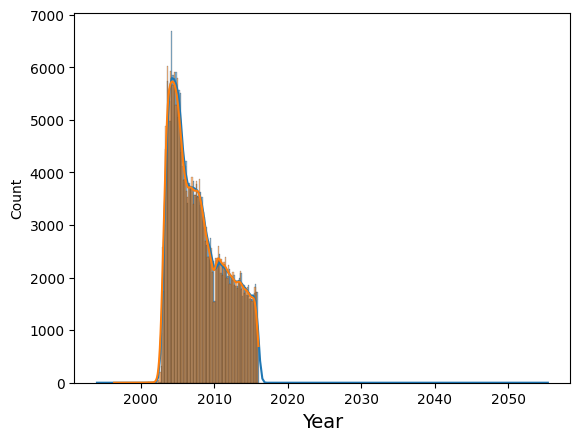

In [42]:
sns.histplot(df['Date Received'], kde=True)
sns.histplot(df['Incident Date'], kde=True)
plt.xlabel('Year', size=14)

In [43]:
diff_date = df['Date Received']-df['Incident Date']
diff_date.median()

Timedelta('23 days 00:00:00')

In [44]:
df.loc[(df['Incident Date'].isna()),'Incident Date']= df['Date Received']-pd.offsets.Day(23)
df.loc[(df['Date Received'].isna()),'Date Received']=df['Incident Date']+pd.offsets.Day(23)

In [45]:
df.drop(df[df['Incident Date'].isna()].index, inplace=True)

In [46]:
df[['Date Received', 'Incident Date']].isna().sum()

Date Received    0
Incident Date    0
dtype: int64

In [47]:
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4416,0401107L,2003-04-01,2003-02-20,PHX,Phoenix Sky Harbor International,NaN,NaN,Checked Baggage,Locks,$20.00,Approved,$20.00,Approve in Full
4481,0401004L,2003-04-01,2002-11-29,RSW,Southwest Florida International,NaN,Property Damage,Checkpoint,Cameras - Digital,$120.00,Settled,$40.00,Settle
4479,0401002L,2003-04-01,2003-02-16,LGA,LaGuardia,NaN,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$550.00,Settled,$275.00,Settle
4478,0401128L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
97224,0806105M,2003-08-16,2003-07-24,SJC,Norman Y Mineta San Jose International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$90.00,Settled,$63.00,Settle
97225,0813013M,2003-08-05,2003-07-13,SMF,Sacramento International Airport,NaN,Property Damage,Checked Baggage,Other,$50.00,Settled,$25.00,Settle
97226,0825021M,2003-08-26,2003-08-03,PDX,Portland International,NaN,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,$477.00,Settled,$238.50,Settle
97227,0909824M,2002-10-30,2002-10-07,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Other,$1;190.15,Settled,$755.80,Settle
97230,21525,2002-12-18,2002-11-25,LGA,LaGuardia,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,$2;200.00,Settled,$1;197.00,Settle


##### `Airport Code` & `Airport Name`

Dari data missing value diatas, `Airport Code` & `Airport Name` memiliki missing value dengan jumlah & letak yang sama persis.

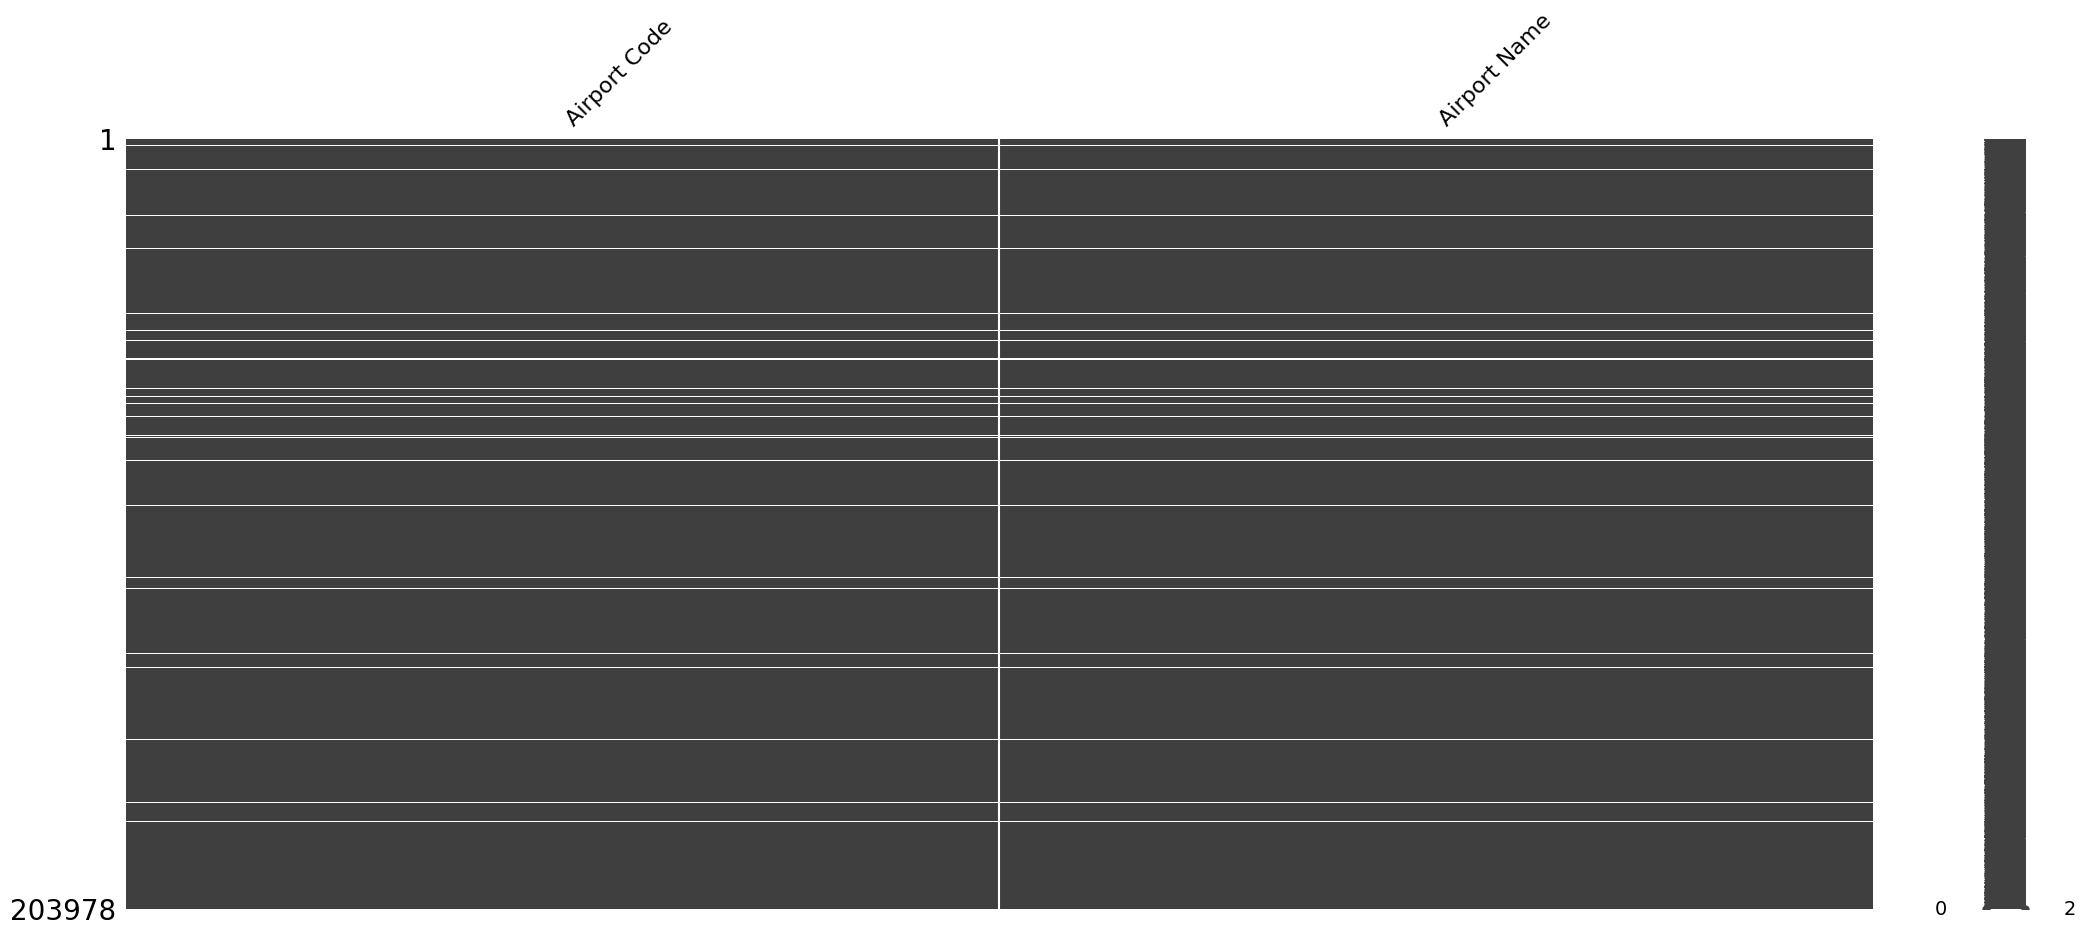

In [48]:
mn.matrix(df[['Airport Code','Airport Name']])
plt.show()

Kita tinjau missing values untuk kolom `Airport Code` & `Airport Name` dari kolom `Claim Site` & `Claim Type` nya. Karena jenis claim bisa saja berbeda pada setiap bandara. Untuk central tendency kita menggunakan **Modus**, karena kedua kolom tersebut merupakan kolom kategorikal.

In [49]:
df.groupby('Claim Site')[['Airport Code', 'Airport Name']].agg(pd.Series.mode).reset_index()

,Claim Site,Airport Code,Airport Name
0,Bus Station,"[EWR, JFK]","[John F. Kennedy International, Newark International Airport]"
1,Checked Baggage,LAX,Los Angeles International Airport
2,Checkpoint,LAX,Los Angeles International Airport
3,Motor Vehicle,ZZX,Non TSA Airport (motor vehicle)
4,Other,LAX,Los Angeles International Airport


In [50]:
df.groupby('Claim Type')[['Airport Code', 'Airport Name']].agg(pd.Series.mode).reset_index()

,Claim Type,Airport Code,Airport Name
0,Bus Terminal,SYR,Syracuse-Hancock International
1,Complaint,PHX,Phoenix Sky Harbor International
2,Compliment,"[BFL, MMH]","[Mammoth Lakes, Meadows Field; Bakersfield Airport]"
3,Employee Loss (MPCECA),ORD,Chicago O'Hare International Airport
4,Motor Vehicle,ZZX,Non TSA Airport (motor vehicle)
5,Passenger Property Loss,JFK,John F. Kennedy International
6,Passenger Theft,LAX,Los Angeles International Airport
7,Personal Injury,LAX,Los Angeles International Airport
8,Property Damage,LAX,Los Angeles International Airport
9,Wrongful Death,JAN,Jackson International


Terbukti pada 2 tabel diatas, setiap `Claim Site` & `Claim Type` memiliki modus bandara yang berbeda-beda. Sehingga kita akan mengisi missing values kolom `Airport Code` & `Airport Name` berdasarkan `Claim Site` lalu `Claim Type` nya. Namun, di kolom `Claim Site` & `Claim Type` memiliki beberapa missing values, sehingga kita gunakan langkah sebagai berikut:
1. Mengisi dengan modus `Claim Site`
2. Jika kolom `Claim Site` kosong, kita akan isi dengan modus `Claim Type`
3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan

In [51]:
def fill_missing_values_by(df_missing, missing_col, group, method):
    if method == 'mode':
        grouped_df = df.groupby(group)[missing_col].value_counts()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value].index[0]

    elif method == 'mean':
        grouped_df = df.groupby(group)[missing_col].mean()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]
    
    elif method == 'median':
        grouped_df = df.groupby(group)[missing_col].median()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]

In [52]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38354,18.803008
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Airport Code,8701,4.265656
6,Airport Name,8701,4.265656
7,Item,8142,3.991607
8,Claim Type,7943,3.894047
9,Claim Site,771,0.377982


In [53]:
missing_airport = df[df['Airport Code'].isna()]
missing_airport

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4478,0401128L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,2003-03-09,NaN,NaN,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97192,0909815M,2003-06-23,2003-05-31,NaN,NaN,NaN,Property Damage,Checkpoint,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,$90.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
97196,0909842M,2003-02-10,2003-01-18,NaN,NaN,NaN,Property Damage,Checked Baggage,Photographic Film,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
97198,0912802M,2002-12-09,2002-11-16,NaN,NaN,NaN,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
97212,0702549M,2003-01-30,2003-01-07,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Other,$70.00,Settled,$35.00,Settle


1. Mengisi dengan modus `Claim Site`

In [54]:
fill_missing_values_by(df, 'Airport Code', 'Claim Site', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Site', method='mode')

In [55]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38354,18.803008
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Item,8142,3.991607
6,Claim Type,7943,3.894047
7,Claim Site,771,0.377982
8,Airport Code,219,0.107365
9,Airport Name,219,0.107365


In [56]:
missing_airport.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4478,0401128L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,2003-03-09,NaN,NaN,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


In [57]:
df[df['Airport Code'].isna()].head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
31816,2004051451950,2004-04-01,2004-03-09,NaN,NaN,NaN,NaN,NaN,Clothing - Shoes; belts; accessories; etc.,NaN,Canceled,$0.00,NaN
31987,2004051452265,2004-04-01,2004-03-16,NaN,NaN,NaN,Property Damage,NaN,Luggage (all types including footlockers),$60.00,Settled,$30.00,Settle
60670,2005040581517,2005-04-01,2005-03-18,NaN,NaN,NaN,Passenger Property Loss,NaN,Clothing - Shoes; belts; accessories; etc.,$67.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
41346,2004122170045,2004-08-01,2004-09-28,NaN,NaN,NaN,NaN,NaN,NaN,$312.00,Canceled,$0.00,NaN
144145,2009120265970,2009-12-01,2009-12-03,NaN,NaN,NaN,Passenger Property Loss,NaN,NaN,$0.00,Canceled,NaN,NaN


2. Jika kolom `Claim Site` kosong, kita akan isi dengan modus `Claim Type`

In [58]:
fill_missing_values_by(df, 'Airport Code', 'Claim Type', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Type', method='mode')

In [59]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38354,18.803008
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Item,8142,3.991607
6,Claim Type,7943,3.894047
7,Claim Site,771,0.377982
8,Airport Code,82,0.040200
9,Airport Name,82,0.040200


In [60]:
missing_airport.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4478,0401128L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,2003-03-09,NaN,NaN,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


In [61]:
df[df['Airport Code'].isna()].head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
31816,2004051451950,2004-04-01,2004-03-09,NaN,NaN,NaN,NaN,NaN,Clothing - Shoes; belts; accessories; etc.,NaN,Canceled,$0.00,NaN
41346,2004122170045,2004-08-01,2004-09-28,NaN,NaN,NaN,NaN,NaN,NaN,$312.00,Canceled,$0.00,NaN
111480,2007100533102,2007-10-01,2007-09-08,NaN,NaN,Jet Blue,NaN,NaN,NaN,$112.00,Canceled,$0.00,NaN
114976,2007121236470,2007-12-10,2007-11-15,NaN,NaN,NaN,NaN,NaN,NaN,$939.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
125355,2008071646997,2008-07-10,2008-07-08,NaN,NaN,NaN,NaN,NaN,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan

In [62]:
df['Airport Code'] = df['Airport Code'].fillna(df['Airport Code'].mode()[0])
df['Airport Name'] = df['Airport Name'].fillna(df['Airport Name'].mode()[0])

In [63]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38354,18.803008
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Item,8142,3.991607
6,Claim Type,7943,3.894047
7,Claim Site,771,0.377982
8,Claim Number,0,0.000000
9,Date Received,0,0.000000


In [64]:
missing_airport.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4478,0401128L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,2003-03-09,NaN,NaN,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,2003-03-09,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


In [65]:
df.head(20)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4416,0401107L,2003-04-01,2003-02-20,PHX,Phoenix Sky Harbor International,NaN,NaN,Checked Baggage,Locks,$20.00,Approved,$20.00,Approve in Full
4481,0401004L,2003-04-01,2002-11-29,RSW,Southwest Florida International,NaN,Property Damage,Checkpoint,Cameras - Digital,$120.00,Settled,$40.00,Settle
4479,0401002L,2003-04-01,2003-02-16,LGA,LaGuardia,NaN,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$550.00,Settled,$275.00,Settle
4478,0401128L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4477,0401127L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4476,0401124L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,AirTran Airlines,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4475,0401094L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,NaN,NaN,Other,Eyeglasses - (including contact lenses),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4474,0401090L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4473,0401077L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN
4472,0401069L,2003-04-01,2003-03-01,LAX,Los Angeles International Airport,NaN,Passenger Property Loss,Checkpoint,Currency,$17.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,NaN


In [66]:
df[df['Airport Code'].isna()].head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


Semua missing value `Airport Code` & `Airport Name` sudah berhasil ditangani.

##### `Airline Name`

Pesawat yang paling sering take off/mendarat di suatu bandara, biasanya berbeda antara satu bandara dengan yang lain. Mari kita lihat persebaran nya.

In [67]:
df.groupby('Airport Code')['Airline Name'].value_counts().groupby(level=0, group_keys=False).head(3).to_frame().head(21)

Airline Name
Airport Code Airline Name                      
ABE          USAir                           22
             UAL                             17
             Delta Air Lines                 15
ABI          American Airlines               33
             American Eagle                   3
             Continental Airlines             1
ABQ          Southwest Airlines             316
             American Airlines              122
             Delta Air Lines                 98
ABR          Northwest Airlines              13
             Delta Air Lines                  8
             Frontier Airlines                1
ABY          Delta Air Lines                 24
             American Airlines                1
             Continental Airlines             1
ACK          Cape Air                         8
             Continental Airlines             6
             Jet Blue                         4
ACT          American Airlines               23
             Continental Airlines             3
             American Eagle                   2

Terbukti bahwa frekuensi tertinggi pesawat berbeda antara satu bandara dengan yang lain. Oleh karena itu, pengisian missing value `Airline Name` akan dilakukan berdasarkan Modus `Airport Code`.

Perlu dicek apakah ada `Airport Code` yang tidak memiliki `Airline Name`.

In [68]:
df.groupby('Airport Code')['Airline Name'].count()[df.groupby('Airport Code')['Airline Name'].count()==0].to_frame()

,Airline Name
Airport Code,
AHN,0
GON,0
GRO,0
HDQ,0
HII,0
HRO,0
MWH,0
PMD,0
RME,0


Ternyata ada 10 `Airport Code` yang tidak memiliki `Airline Name`. Kita akan isi dengan value `Not Available`.

In [69]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38354,18.803008
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Item,8142,3.991607
6,Claim Type,7943,3.894047
7,Claim Site,771,0.377982
8,Claim Number,0,0.000000
9,Date Received,0,0.000000


In [70]:
no_airline = df[df['Airport Code'].isin(['AHN', 'GON', 'GRO', 'HDQ', 'HII', 'HRO', 'MWH', 'PMD', 'RME', 'VEL'])]
df.loc[no_airline.index, 'Airline Name'] = 'Not Available'

In [71]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Airline Name,38319,18.785849
3,Claim Amount,16517,8.097442
4,Status,12651,6.202139
5,Item,8142,3.991607
6,Claim Type,7943,3.894047
7,Claim Site,771,0.377982
8,Claim Number,0,0.000000
9,Date Received,0,0.000000


Kemudian kita isi missing values lain pada kolom `Airline Code` menggunakan `Airport Code`.

In [72]:
fill_missing_values_by(df, 'Airline Name', 'Airport Code', method = 'mode')

In [73]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Item,8142,3.991607
5,Claim Type,7943,3.894047
6,Claim Site,771,0.377982
7,Claim Number,0,0.000000
8,Date Received,0,0.000000
9,Incident Date,0,0.000000


##### `Claim Type` & `Claim Site`

Pengisian `Claim Type` & `Claim Site`:
1. Tipe klaim pada satu bandara dengan yang lain pasti berbeda. Oleh karena itu, kita mengisi `Claim Type` berdasarkan **modus** `Airport Code` nya.
2. Kemudian `Claim Site` kita akan isi berdasarkan **modus** `Claim Type` nya, karena suatu site pasti memiliki karakteristik tipe klaim tersendiri.

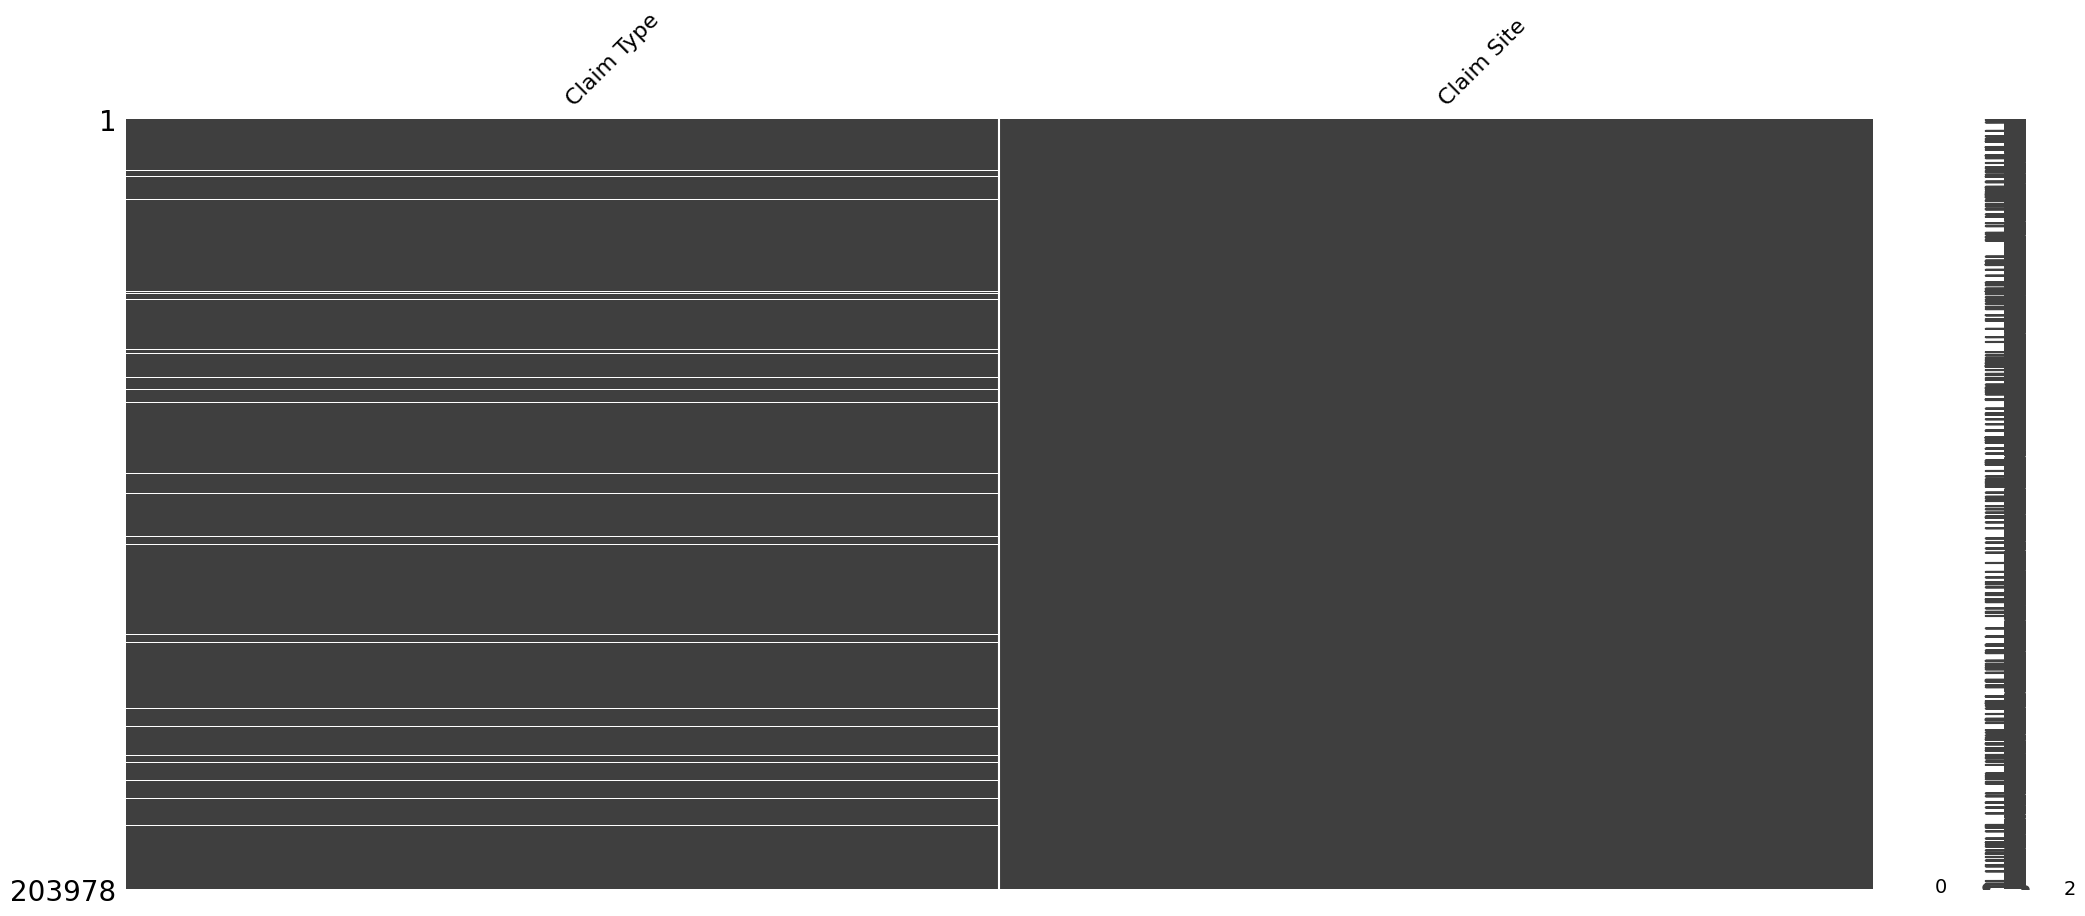

In [74]:
mn.matrix(df[['Claim Type','Claim Site']])
plt.show()

1. Pengisian kolom `Claim Type` berdasarkan **modus** `Airport Code` nya.

In [75]:
df.groupby('Airport Code')[['Claim Type']].agg(pd.Series.mode).reset_index()

,Airport Code,Claim Type
0,ABE,Property Damage
1,ABI,Passenger Property Loss
2,ABQ,Passenger Property Loss
3,ABR,Passenger Property Loss
4,ABY,Passenger Property Loss
...,...,...
459,YKM,Passenger Property Loss
460,YNG,Passenger Property Loss
461,YUM,Passenger Property Loss
462,ZZX,Motor Vehicle


In [76]:
df.groupby('Airport Code')[['Claim Type']].agg(pd.Series.mode).reset_index()['Claim Type'].value_counts()

Passenger Property Loss                              367
Property Damage                                       64
Motor Vehicle                                          3
Personal Injury                                        2
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Personal Injury]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Passenger Theft]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Property Damage]             1
[Passenger Property Loss, Prope

In [77]:
df['Claim Type'].value_counts()

Passenger Property Loss    117860
Property Damage             75356
Personal Injury              1448
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 366
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [78]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Item,8142,3.991607
5,Claim Type,7943,3.894047
6,Claim Site,771,0.377982
7,Claim Number,0,0.000000
8,Date Received,0,0.000000
9,Incident Date,0,0.000000


In [79]:
fill_missing_values_by(df, 'Claim Type', 'Airport Code', method='mode')

In [80]:
df['Claim Type'].value_counts()

Passenger Property Loss    125671
Property Damage             75466
Personal Injury              1449
Employee Loss (MPCECA)        485
Passenger Theft               465
Motor Vehicle                 387
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [81]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Item,8142,3.991607
5,Claim Site,771,0.377982
6,Claim Number,0,0.000000
7,Date Received,0,0.000000
8,Incident Date,0,0.000000
9,Airport Code,0,0.000000


2. Pengisian kolom `Claim Site` berdasarkan **modus** `Claim Type` nya.

In [82]:
df.groupby('Claim Type')[['Claim Site']].agg(pd.Series.mode).reset_index()

,Claim Type,Claim Site
0,Bus Terminal,Checked Baggage
1,Complaint,Checkpoint
2,Compliment,Checkpoint
3,Employee Loss (MPCECA),Checked Baggage
4,Motor Vehicle,Motor Vehicle
5,Passenger Property Loss,Checked Baggage
6,Passenger Theft,Checked Baggage
7,Personal Injury,Checkpoint
8,Property Damage,Checked Baggage
9,Wrongful Death,Other


In [83]:
df.groupby('Claim Type')[['Claim Site']].agg(pd.Series.mode).reset_index()['Claim Site'].value_counts()

Checked Baggage    5
Checkpoint         3
Motor Vehicle      1
Other              1
Name: Claim Site, dtype: int64

In [84]:
df['Claim Site'].value_counts()

Checked Baggage    159743
Checkpoint          40121
Other                2858
Motor Vehicle         469
Bus Station            16
Name: Claim Site, dtype: int64

In [85]:
fill_missing_values_by(df, 'Claim Site', 'Claim Type', method='mode')

In [86]:
df['Claim Site'].value_counts()

Checked Baggage    160471
Checkpoint          40145
Other                2858
Motor Vehicle         488
Bus Station            16
Name: Claim Site, dtype: int64

In [87]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Item,8142,3.991607
5,Claim Number,0,0.000000
6,Date Received,0,0.000000
7,Incident Date,0,0.000000
8,Airport Code,0,0.000000
9,Airport Name,0,0.000000


Missing values pada kolom `Claim Type` & `Claim Site` berhasil ditangani.

##### `Item`

Karena secara domain knowledge kurang terkait dengan kolom yang lain, missing values pada kolom `Item` akan diisi menggunakan modus keseluruhan.

In [88]:
df['Item'].value_counts().head()

Other                                         36902
Luggage (all types including footlockers)     19122
Clothing - Shoes; belts; accessories; etc.    14934
Jewelry - Fine                                 9899
Locks                                          9568
Name: Item, dtype: int64

In [89]:
df['Item'].nunique()

4703

In [90]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Item,8142,3.991607
5,Claim Number,0,0.000000
6,Date Received,0,0.000000
7,Incident Date,0,0.000000
8,Airport Code,0,0.000000
9,Airport Name,0,0.000000


In [91]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])

In [92]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Claim Number,0,0.000000
5,Date Received,0,0.000000
6,Incident Date,0,0.000000
7,Airport Code,0,0.000000
8,Airport Name,0,0.000000
9,Airline Name,0,0.000000


Missing values pada kolom `Item` berhasil ditangani.

##### `Claim Amount`

Besarnya `Claim Amount` bergantung pada `Item` apa yang mereka klaim. Namun ada beberapa `Item` yang tidak memiliki data `Claim Amount` sama sekali.
Oleh karena itu, missing values pada kolom `Claim Amoung` akan diisi dengan mengikuti langkah berikut:
1. Mengisi median `Claim Amount` berdasarkan `Item`
2. Jika kolom `Item` tidak memiliki value `Claim Amount` sama sekali, kita akan isi dengan median `Claim Amount` berdasarkan kolom `Claim Type`
3. Jika kedua kolom `Claim Site` & `Claim Type` kosong, kita akan isi dengan modus keseluruhan

Sebelumnya, kita bersihkan kolom `Claim Amount` terlebih dahulu, karena mengandung simbol `$` & `;` serta masih bertipe `object`.

In [93]:
def remove_and_format(df, col, remove, dtype='str'):
    if type(remove) == list:
        
        if type(col) == list:
            for i in col:
                for j in remove:
                    df[i] = df[i].str.replace(j,'', regex=False)
                df[i] = df[i].astype(dtype)

        elif type(col) == str:
            for j in remove:
                df[col] = df[col].str.replace(j,'', regex=False)
            df[col] = df[col].astype(dtype)

In [94]:
df['Claim Amount'].describe()


count     187461
unique     36115
top        $0.00
freq       28442
Name: Claim Amount, dtype: object

In [95]:
remove_and_format(df, 'Claim Amount', ['$', ';'], 'float64')

1. Mengisi `Claim Amount` berdasarkan median `Item`

In [96]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Amount,16517,8.097442
3,Status,12651,6.202139
4,Claim Number,0,0.000000
5,Date Received,0,0.000000
6,Incident Date,0,0.000000
7,Airport Code,0,0.000000
8,Airport Name,0,0.000000
9,Airline Name,0,0.000000


In [97]:
fill_missing_values_by(df, 'Claim Amount', 'Item', method='median')

In [98]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Status,12651,6.202139
3,Claim Amount,209,0.102462
4,Claim Number,0,0.000000
5,Date Received,0,0.000000
6,Incident Date,0,0.000000
7,Airport Code,0,0.000000
8,Airport Name,0,0.000000
9,Airline Name,0,0.000000


2. Mengisi `Claim Amount` berdasarkan median `Item`

In [99]:
fill_missing_values_by(df, 'Claim Amount', 'Claim Type', method='median')

In [100]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Status,12651,6.202139
3,Claim Number,0,0.000000
4,Date Received,0,0.000000
5,Incident Date,0,0.000000
6,Airport Code,0,0.000000
7,Airport Name,0,0.000000
8,Airline Name,0,0.000000
9,Claim Type,0,0.000000


Missing values berhasil ditangani.

##### `Status`

Status setiap klaim pasti berbeda, jika missing values pada kolom `Status` ini diisi menggunakan modus, akan menimbulkan bias & data tidak valid. Oleh karena itu, missing value diisi dengan `Not Available`.

In [101]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Status,12651,6.202139
3,Claim Number,0,0.000000
4,Date Received,0,0.000000
5,Incident Date,0,0.000000
6,Airport Code,0,0.000000
7,Airport Name,0,0.000000
8,Airline Name,0,0.000000
9,Claim Type,0,0.000000


In [102]:
df['Status'] = df['Status'].fillna('Not Available')

In [103]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68758,33.708537
2,Claim Number,0,0.000000
3,Date Received,0,0.000000
4,Incident Date,0,0.000000
5,Airport Code,0,0.000000
6,Airport Name,0,0.000000
7,Airline Name,0,0.000000
8,Claim Type,0,0.000000
9,Claim Site,0,0.000000


Missing values berhasil ditangani. Kemudian kita akan menyeragamkan data karena ada beberapa values yang memiliki makna sama (Seperti yang telah dibahas pada Data Overview).

In [104]:
df['Status'].value_counts()

Denied                                                                                                                           68334
Approved                                                                                                                         34995
Deny                                                                                                                             28234
Settled                                                                                                                          27955
Not Available                                                                                                                    12651
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          6910
Settle                                                 

In [105]:
df['Status'] = df['Status'].str.replace('Denied', 'Deny', regex=False)
df['Status'] = df['Status'].str.replace('Approved', 'Approve in Full', regex=False)
df['Status'] = df['Status'].str.replace('Settled', 'Settle', regex=False)

In [106]:
df['Status'].value_counts()

Deny                                                                                                                             96568
Approve in Full                                                                                                                  47359
Settle                                                                                                                           33719
Not Available                                                                                                                    12651
Canceled                                                                                                                          6910
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     5338
Closed as a contractor claim                                                                                                      1314
In litigation                                          

##### `Close Amount`

Untuk `Close Amount`, dimana merupakan nominal klaim yang dibayarkan, akan diisi menggunakan domain knowledge sebagai berikut:
1. Jika `Disposition` memiliki value `Approve in Full`, diasumsikan bahwa nilai `Close Amount` sama dengan `Claim Amount`
2. Jika `Disposition` memiliki value `Deny`, diasumsikan bahwa nilai `Close Amount` sama dengan 0
3. Jika `Disposition` memiliki value `Settle`, nilai `Close Amount` akan ditinjau antara perbandingan `Close Amount` dan `Claim Amount`

In [107]:
df['Disposition'].value_counts()

Deny               68377
Approve in Full    35006
Settle             27964
Name: Disposition, dtype: int64

In [108]:
df[df['Close Amount'].isna()]['Disposition'].value_counts()

Deny               1328
Approve in Full     141
Settle                4
Name: Disposition, dtype: int64

Mengisi missing value dengan pada `Close Amount` dengan `Claim Amount`

In [109]:
df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Close Amount'] = pd.to_numeric(df['Close Amount'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_18428\2109266383.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')


In [110]:
df.loc[(df['Close Amount'].isna())&(df['Disposition']=='Approve in Full'),'Close Amount']=df['Claim Amount']

In [111]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,68617,33.639412
2,Claim Number,0,0.000000
3,Date Received,0,0.000000
4,Incident Date,0,0.000000
5,Airport Code,0,0.000000
6,Airport Name,0,0.000000
7,Airline Name,0,0.000000
8,Claim Type,0,0.000000
9,Claim Site,0,0.000000


In [112]:
diff = df['Close Amount'].loc[df.Disposition=='Settle']/df['Claim Amount']
diff.value_counts()

0.500000    9210
0.250000     385
0.333333     287
0.900000     210
0.400000     189
            ... 
0.498610       1
0.560075       1
0.050747       1
0.516469       1
0.672704       1
Length: 13332, dtype: int64

In [113]:
df[df['Close Amount'].isna()]['Disposition'].value_counts()

Deny      1328
Settle       4
Name: Disposition, dtype: int64

In [114]:
df.loc[(df['Close Amount'].isna())&(df['Disposition']=='Deny'),'Close Amount']=0

In [115]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Close Amount,67289,32.988361
2,Claim Number,0,0.000000
3,Date Received,0,0.000000
4,Incident Date,0,0.000000
5,Airport Code,0,0.000000
6,Airport Name,0,0.000000
7,Airline Name,0,0.000000
8,Claim Type,0,0.000000
9,Claim Site,0,0.000000


Mengisi Missing values `Settle` dengan 50% claim amount

In [116]:
df[df['Close Amount'].isna()]['Disposition'].value_counts()

Settle    4
Name: Disposition, dtype: int64

In [117]:
df['Close Amount'].fillna(df['Claim Amount']*0.5, inplace=True)

In [118]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Claim Number,0,0.000000
2,Date Received,0,0.000000
3,Incident Date,0,0.000000
4,Airport Code,0,0.000000
5,Airport Name,0,0.000000
6,Airline Name,0,0.000000
7,Claim Type,0,0.000000
8,Claim Site,0,0.000000
9,Item,0,0.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203978 entries, 4416 to 97230
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   203978 non-null  object        
 1   Date Received  203978 non-null  datetime64[ns]
 2   Incident Date  203978 non-null  datetime64[ns]
 3   Airport Code   203978 non-null  object        
 4   Airport Name   203978 non-null  object        
 5   Airline Name   203978 non-null  object        
 6   Claim Type     203978 non-null  object        
 7   Claim Site     203978 non-null  object        
 8   Item           203978 non-null  object        
 9   Claim Amount   203978 non-null  float64       
 10  Status         203978 non-null  object        
 11  Close Amount   203978 non-null  float64       
 12  Disposition    131347 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 29.8+ MB


##### `Disposition`

Sama seperti kolom `Status`, missing values pada kolom ini akan diisi dengan `Not Available`.

In [120]:
df['Disposition'].value_counts()

Deny               68377
Approve in Full    35006
Settle             27964
Name: Disposition, dtype: int64

In [121]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,Disposition,72631,35.607271
1,Claim Number,0,0.000000
2,Date Received,0,0.000000
3,Incident Date,0,0.000000
4,Airport Code,0,0.000000
5,Airport Name,0,0.000000
6,Airline Name,0,0.000000
7,Claim Type,0,0.000000
8,Claim Site,0,0.000000
9,Item,0,0.000000


In [122]:
list_status = ['Approve in Full', 'Deny', 'Settle']
missing_disposition = df[(df['Disposition'].isnull()) & (df['Status'].isin(list_status))]
df.loc[missing_disposition.index, 'Disposition'] = df.loc[missing_disposition.index, 'Status']
df['Disposition'] = df['Disposition'].fillna('Not Available')

In [123]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


Semua pengisian missing values telah selesai. Kita akan lanjut ke koreksi format dan tipe data.

### C.3.d Data Range

Sesuai dengan deskripsi kolom,
* Date Received: Tanggal ketika laporan diterima
* Incident Date: Tanggal ketika insiden terjadi

Seharusnya `Incident Date` memiliki tanggal yang lebih tua dari `Date Received`. Kita akan tinjau baris yang memiliki data seperti itu.

In [124]:
odd_dates = df[df['Date Received'] < df['Incident Date']]
display(odd_dates.shape,odd_dates.head(),odd_dates.tail())

(1707, 13)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
4458,0401082L,2003-04-01,2003-06-02,MIA,Miami International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,150.0,Deny,0.0,Deny
4517,2004042950167,2003-04-01,2004-03-17,MCO,Orlando International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,200.0,Settle,100.0,Settle
31935,2004052153005,2004-04-01,2004-04-08,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checkpoint,Currency,5000.0,Deny,0.0,Deny
31805,2004052153021,2004-04-01,2004-05-05,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,300.0,Approve in Full,300.0,Approve in Full
31830,2004052153031,2004-04-01,2004-04-25,LAX,Los Angeles International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,600.0,Canceled,300.0,Not Available


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
15547,0909006M,2003-09-09,2003-09-19,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,200.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,100.00,Not Available
15555,0909007M,2003-09-09,2003-09-28,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,44.99,Settle,40.49,Settle
44228,2004101364877,2004-09-09,2004-12-08,LAS,McCarran International,Southwest Airlines,Property Damage,Checked Baggage,Locks,250.00,Deny,0.00,Deny
44428,2004122270597,2004-09-09,2004-10-17,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Other,62.99,Settle,37.99,Settle
44341,2004122270588,2004-09-09,2004-10-29,MSP,Minneapolis/ St.Paul International Airport,UAL,Property Damage,Checked Baggage,Computer - Laptop,146.02,Deny,0.00,Deny


Kita akan menghilangkan baris yang memiliki `Date Received` yang lebih tua dari `Incident Date`.

In [125]:
df = df.drop(odd_dates.index)

In [126]:
df.shape

(202271, 13)

Selanjutnya, menurut informasi yang dimuat dalam lama kaggle untuk dataset ini. Dataset ini mencakup klaim yang diajukan antara **tahun 2002 hingga 2015**. Sehingga kita akan menghapus data diluar range tersebut.

In [127]:
out_range_date = df[(df['Date Received']<'2002-01-01')|(df['Incident Date']<'2002-01-01')|(df['Date Received']>'2015-12-31')|(df['Incident Date']>'2015-12-31')]
display(out_range_date.shape,out_range_date.head(),out_range_date.tail())

(39, 13)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
75315,2005112396390,2005-11-10,2000-11-03,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,600.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,300.000,Not Available
61514,2005041282311,2005-04-12,2001-04-04,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Other,154.96,Deny,0.000,Deny
27726,0212302M,2004-02-12,2001-02-01,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,65.00,Approve in Full,65.000,Approve in Full
96942,0212087M,2040-02-12,2003-12-20,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Property Damage,Checked Baggage,Other,8.48,Approve in Full,8.480,Approve in Full
44757,2004092763980,2004-09-14,2000-08-28,DFW,Dallas-Fort Worth International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,89.99,Canceled,44.995,Not Available


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
29229,0305106M,2004-03-05,2000-01-01,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,40.00,Approve in Full,40.00,Approve in Full
100822,2007030922029,2007-03-05,2000-12-30,BUF,Buffalo Niagara International,USAir,Passenger Property Loss,Checked Baggage,Locks,25.00,Settle,12.50,Settle
24541,0107420M,2004-01-07,2000-12-21,PIE,St. Petersburg-Clearwater International,Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,40.66,Settle,20.33,Settle
96936,2006051105953,2020-05-08,2006-04-04,JFK,John F. Kennedy International,Jet Blue,Property Damage,Checked Baggage,Clocks - Inexpensive ($75.00 or less); Clothing - Shoes; belts; accessories; etc.; Lighting Supplies (globe domes; electric candlesticks; candelabra; etc.); Luggage (all types including footlockers),637.76,Settle,179.08,Settle
44049,2004100464331,2004-09-09,2001-09-01,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,30.00,Approve in Full,30.00,Approve in Full


In [128]:
df = df.drop(out_range_date.index)

In [129]:
df.shape

(202232, 13)

### C.3.e Data Matching

#### `Airport Code` & `Airport Name`

Values pada `Airport Name` seharusnya matching dengan values `Airport Code` nya.

In [130]:
print('Jumlah nunique Airport Code:', df['Airport Code'].nunique())
print('Jumlah nunique Airport Name:', df['Airport Name'].nunique())

Jumlah nunique Airport Code: 464
Jumlah nunique Airport Name: 466


Ternyata, jumlah values unik `Airport Code` berbeda dengan `Airport Name`. Kita akan tinjau `Airport Code` mana yang memiliki lebih dari 1 nunique `Airport Name`.

In [131]:
airport_name_multiple = df.groupby('Airport Code')['Airport Name'].nunique()
airport_name_multiple[airport_name_multiple > 1].to_frame()

,Airport Name
Airport Code,
BZN,2
EWR,2
PNS,2


In [132]:
df.groupby('Airport Code')['Airport Name'].value_counts()[['BZN', 'EWR', 'PNS']]

Airport Code  Airport Name                             
BZN           Gallatin Field                                194
              Bozeman Yellowstone International Airport       1
EWR           Newark International Airport                 6796
              John F. Kennedy International                   1
PNS           Pensacola Regional                            227
              Pensacola International Airport                14
Name: Airport Name, dtype: int64

Menurut List `Airport Code` & `Airport Name` di Amerika Serikat yang dimuat pada laman [Wikipedia](https://en.wikipedia.org/wiki/List_of_airports_in_the_United_States), berikut `Airport Code` & `Airport Name` yang benar:

| `Airport Code` | `Airport Name`
|---|---|
| `BZN`  | `Bozeman Yellowstone International Airport`
| `EWR` | `Newark International Airport`
| `PNS` | `Pensacola International Airport`

In [133]:
df.loc[df['Airport Code'] == 'BZN', 'Airport Name'] = 'Bozeman Yellowstone International Airport'
df.loc[df['Airport Code'] == 'EWR', 'Airport Name'] = 'Newark International Airport'
df.loc[df['Airport Code'] == 'PNS', 'Airport Name'] = 'Pensacola International Airport'

In [134]:
print('Jumlah nunique Airport Code:', df['Airport Code'].nunique())
print('Jumlah nunique Airport Name:', df['Airport Name'].nunique())

Jumlah nunique Airport Code: 464
Jumlah nunique Airport Name: 464


### C.3.f Data Binning

#### `Disposition`

In [135]:
df['Disposition'].value_counts()

Deny               95844
Approve in Full    46991
Settle             33424
Not Available      25973
Name: Disposition, dtype: int64

Akan dilakukan binning:
* `Approve in Full` & `Settle` -> `Approved or Settled`
* `Deny` & `Not Available` -> `Denied or Not Available`

In [136]:

df['Disposition Group'] = np.where(df['Disposition'].isin(['Approve in Full', 'Settle']),
                           'Approved or Settled',
                           'Denied or Not Available')

display(df.shape,df.head(),df.tail())

(202232, 14)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Disposition Group
4416,0401107L,2003-04-01,2003-02-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,20.00,Approve in Full,20.000,Approve in Full,Approved or Settled
4481,0401004L,2003-04-01,2002-11-29,RSW,Southwest Florida International,Delta Air Lines,Property Damage,Checkpoint,Cameras - Digital,120.00,Settle,40.000,Settle,Approved or Settled
4479,0401002L,2003-04-01,2003-02-16,LGA,LaGuardia,American Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,550.00,Settle,275.000,Settle,Approved or Settled
4478,0401128L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available
4477,0401127L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Disposition Group
97224,0806105M,2003-08-16,2003-07-24,SJC,Norman Y Mineta San Jose International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,90.00,Settle,63.0,Settle,Approved or Settled
97225,0813013M,2003-08-05,2003-07-13,SMF,Sacramento International Airport,Southwest Airlines,Property Damage,Checked Baggage,Other,50.00,Settle,25.0,Settle,Approved or Settled
97226,0825021M,2003-08-26,2003-08-03,PDX,Portland International,Alaska Airlines,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,477.00,Settle,238.5,Settle,Approved or Settled
97227,0909824M,2002-10-30,2002-10-07,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Other,1190.15,Settle,755.8,Settle,Approved or Settled
97230,21525,2002-12-18,2002-11-25,LGA,LaGuardia,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,2200.00,Settle,1197.0,Settle,Approved or Settled


#### `Item`

In [137]:
df['Item'].value_counts().head(50)

Other                                                                                                       44569
Luggage (all types including footlockers)                                                                   18907
Clothing - Shoes; belts; accessories; etc.                                                                  14774
Jewelry - Fine                                                                                               9800
Locks                                                                                                        9490
Cameras - Digital                                                                                            9076
Computer - Laptop                                                                                            8497
Baggage/Cases/Purses                                                                                         6322
Computer & Accessories                                                                  

In [138]:
df.insert(9, 'Item Group', value= '')

item_dict = {'Luggage':['luggage','baggage', 'bag', 'briefcase', 'purse'],
            'Clothing':['clothing','shoes'],
            'Jewelry':['jewelry'],
            'Lock':['lock'],
            'Electronic': ['camera', 'computer', 'electronic', 'cell phone', 'video', 'audio', 'mp3', 'gps', 'dvd', 'cd', 'hearing aids', 'instrument'],
            'Accessories': ['accessories','eyeglasses', 'watches'],
            'Cosmetic & Medicine':['cosmetic','medicine', 'medical'],
            'Currency':['currency'],
            'Tools':['tool','equipment','home','house','glass','hunting','strollers'],
            'Food': ['food','drink','beverages'],
            'Watches': ['watches'],
            'Toys': ['game']
            }
            
for category, list_item in item_dict.items():
    df['Item Group'] = np.where((df['Item'].str.lower().str.contains('|'.join(list_item))) & (df['Item Group'] != ''),
                       df['Item Group']+ ';' + category,
                       np.where((df['Item'].str.lower().str.contains('|'.join(list_item))) & (df['Item Group'] == ''),
                       df['Item Group'] + category,
                       df['Item Group']))

In [139]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
4416,0401107L,2003-04-01,2003-02-20,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,Lock,20.00,Approve in Full,20.000,Approve in Full,Approved or Settled
4481,0401004L,2003-04-01,2002-11-29,RSW,Southwest Florida International,Delta Air Lines,Property Damage,Checkpoint,Cameras - Digital,Electronic,120.00,Settle,40.000,Settle,Approved or Settled
4479,0401002L,2003-04-01,2003-02-16,LGA,LaGuardia,American Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,Clothing;Accessories,550.00,Settle,275.000,Settle,Approved or Settled
4478,0401128L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available
4477,0401127L,2003-04-01,2003-03-09,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available


In [140]:
df['Item Group'].value_counts()

                                                                                 47786
Electronic                                                                       31820
Luggage;Lock                                                                     19796
Clothing;Accessories                                                             15440
Jewelry                                                                          11077
                                                                                 ...  
Luggage;Jewelry;Electronic;Cosmetic & Medicine                                       1
Luggage;Clothing;Food;Toys                                                           1
Clothing;Accessories;Cosmetic & Medicine;Tools;Watches;Toys                          1
Jewelry;Accessories;Currency;Tools;Watches;Toys                                      1
Clothing;Jewelry;Electronic;Accessories;Cosmetic & Medicine;Food;Watches;Toys        1
Name: Item Group, Length: 474, dtype: int64

In [141]:
df['Item Group'].value_counts().head(50)

                                                         47786
Electronic                                               31820
Luggage;Lock                                             19796
Clothing;Accessories                                     15440
Jewelry                                                  11077
Lock                                                      9767
Cosmetic & Medicine                                       8048
Luggage                                                   7273
Accessories                                               6966
Tools                                                     6185
Electronic;Accessories                                    6023
Clothing                                                  5006
Jewelry;Accessories;Watches                               4681
Accessories;Tools                                         4109
Currency                                                  3532
Food                                                   

In [142]:
df['Item Group'] = df['Item Group'].str.replace('^$', 'Other', regex=True)

In [143]:
df['Item Group'].value_counts()

Other                                                                            47786
Electronic                                                                       31820
Luggage;Lock                                                                     19796
Clothing;Accessories                                                             15440
Jewelry                                                                          11077
                                                                                 ...  
Luggage;Jewelry;Electronic;Cosmetic & Medicine                                       1
Luggage;Clothing;Food;Toys                                                           1
Clothing;Accessories;Cosmetic & Medicine;Tools;Watches;Toys                          1
Jewelry;Accessories;Currency;Tools;Watches;Toys                                      1
Clothing;Jewelry;Electronic;Accessories;Cosmetic & Medicine;Food;Watches;Toys        1
Name: Item Group, Length: 474, dtype: int64

### C.3.g Outlier Data

Outlier pada kolom numerikal (`Claim Amount` & `Close Amount`) akan ditinjau.

In [144]:
df.shape

(202232, 15)

In [145]:
df.describe()

,Claim Amount,Close Amount
count,2.022320e+05,2.022320e+05
mean,1.492157e+07,2.662118e+03
std,6.671106e+09,1.111980e+06
min,0.000000e+00,0.000000e+00
25%,2.000000e+01,0.000000e+00
50%,1.000000e+02,0.000000e+00
75%,3.179800e+02,5.500000e+01
max,3.000000e+12,5.000000e+08


Terlihat pada kolom `Claim Amount` & `Close Amount`, merupakan kolom yang right skewed, karena mean nya jauh lebih tinggi dari median.

`Claim Amount`

In [146]:
claim_amount_Q1 = df['Claim Amount'].quantile(0.25) 
claim_amount_Q3 = df['Claim Amount'].quantile(0.75) 
claim_amount_IQR = claim_amount_Q3 - claim_amount_Q1

claim_amount_outliers = df[(df['Claim Amount'] < (claim_amount_Q1 - 1.5 * claim_amount_IQR)) | (df['Claim Amount'] > (claim_amount_Q3 + 1.5 * claim_amount_IQR))]

print(f'Number of claim amount outliers = {len(claim_amount_outliers)}')
print(f'Percentage of claim amount outliers = {round(len(claim_amount_outliers)/len(df)*100, 2)}%')

Number of claim amount outliers = 23575
Percentage of claim amount outliers = 11.66%


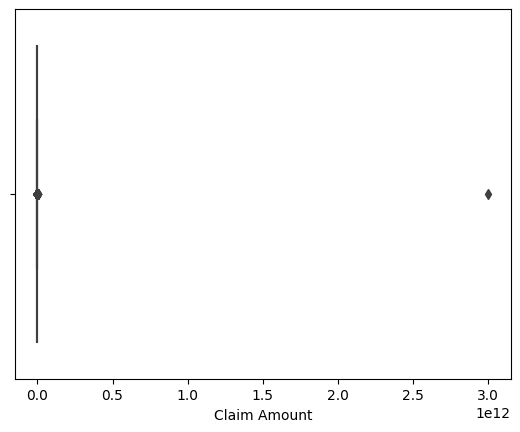

In [147]:
sns.boxplot(data=df, x ='Claim Amount')
plt.show()

In [148]:
df[df['Claim Amount']>500000000000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
118207,2008012238289,2008-02-12,2007-12-28,JFK,John F. Kennedy International,Jet Blue,Personal Injury,Checkpoint,Other,Other,3.000000e+12,Deny,0.0,Deny,Denied or Not Available


Klaim yang memiliki `Claim Amount` sangat tinggi hanya terdapat 1 data diatas. Akan kita tinjau berdasarkan tipe klaim & tempat klaim nya.

In [149]:
df[(df['Claim Type']=='Personal Injury') & (df['Claim Site']=='Checkpoint')]['Claim Amount'].describe()

count    9.800000e+02
mean     3.063543e+09
std      9.583142e+10
min      0.000000e+00
25%      8.999000e+01
50%      5.000000e+02
75%      1.287500e+04
max      3.000000e+12
Name: Claim Amount, dtype: float64

Kita akan drop amount itu, karena tidak wajar. Dicurigai ini terdapat kesalahan penginputan data.

In [150]:
df = df.drop(df['Claim Amount'].idxmax())

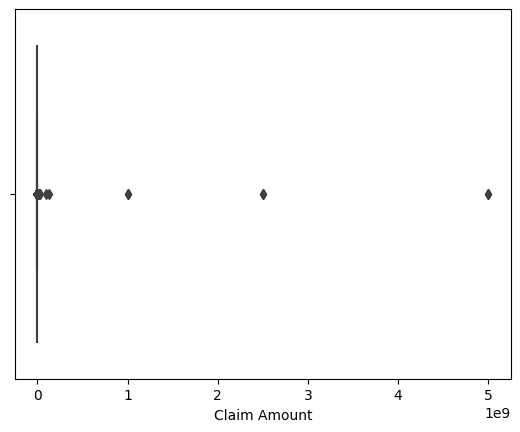

In [151]:
sns.boxplot(data=df, x ='Claim Amount')
plt.show()

`Close Amount`

In [152]:
close_amount_Q1 = df['Close Amount'].quantile(0.25) 
close_amount_Q3 = df['Close Amount'].quantile(0.75) 
close_amount_IQR = close_amount_Q3 - close_amount_Q1

close_amount_outliers = df[(df['Close Amount'] < (close_amount_Q1 - 1.5 * close_amount_IQR)) | (df['Close Amount'] > (close_amount_Q3 + 1.5 * close_amount_IQR))]

print(f'Number of close amount outliers = {len(close_amount_outliers)}')
print(f'Percentage of close amount outliers = {round(len(close_amount_outliers)/len(df)*100, 2)}%')

Number of close amount outliers = 27380
Percentage of close amount outliers = 13.54%


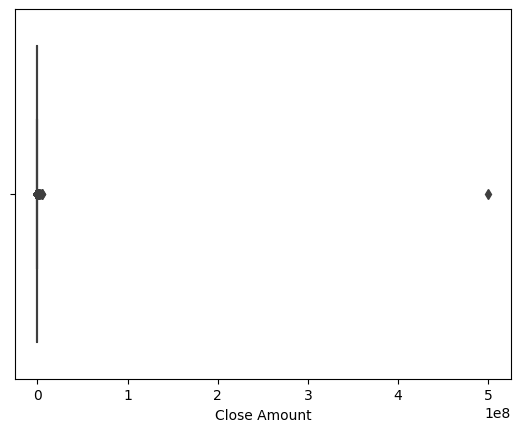

In [153]:
sns.boxplot(data=df, x ='Close Amount')
plt.show()

In [154]:
df[df['Close Amount']>400000000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
129263,2008102251419,2008-10-08,2008-09-15,LAX,Los Angeles International Airport,American Airlines,Personal Injury,Checkpoint,Other,Other,1.000000e+09,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,500000000.0,Not Available,Denied or Not Available


In [155]:
df[(df['Claim Type']=='Personal Injury') & (df['Claim Site']=='Checkpoint')]['Claim Amount'].describe()

count    9.790000e+02
mean     2.320913e+06
std      4.535149e+07
min      0.000000e+00
25%      8.999000e+01
50%      5.000000e+02
75%      1.250000e+04
max      1.000000e+09
Name: Claim Amount, dtype: float64

Menghapus outlier `Close Amount` tertinggi.

In [156]:
df.describe()

,Claim Amount,Close Amount
count,2.022310e+05,2.022310e+05
mean,8.712621e+04,2.662131e+03
std,1.786267e+07,1.111983e+06
min,0.000000e+00,0.000000e+00
25%,2.000000e+01,0.000000e+00
50%,1.000000e+02,0.000000e+00
75%,3.179800e+02,5.500000e+01
max,5.000000e+09,5.000000e+08


In [157]:
df = df.drop(df['Close Amount'].idxmax())

In [158]:
df.describe()

,Claim Amount,Close Amount
count,2.022300e+05,2.022300e+05
mean,8.218178e+04,1.897122e+02
std,1.772379e+07,1.724163e+04
min,0.000000e+00,0.000000e+00
25%,2.000000e+01,0.000000e+00
50%,1.000000e+02,0.000000e+00
75%,3.179800e+02,5.500000e+01
max,5.000000e+09,5.000000e+06


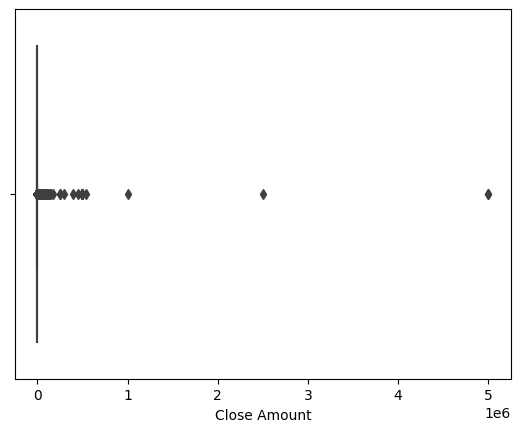

In [159]:
sns.boxplot(data=df, x ='Close Amount')
plt.show()

<hr>

## **C.4 Data Analysis & Visualization**

Akan dijawab pertanyaan-pertanyaan pada problem statement menggunakan [statistik deskriptif](https://en.wikipedia.org/wiki/Descriptive_statistics) & [statistik inferensial](https://en.wikipedia.org/wiki/Statistical_inference).

### **Bagaimana karakteristik insiden yang diajukan terhadap TSA?** (Kolom Kategorikal)

Untuk menjawab pertanyaan ini, kami akan membuat beberapa sub-pertanyaan:

1. Kapan sebagian besar insiden terjadi?
2. Di bandara mana sebagian besar insiden terjadi?
3. Pesawat apa yang paling sering mengalami insiden?
4. Tipe klaim apa yang paling banyak terjadi insiden?
5. Lokasi site klaim mana yang paling banyak terjadi insiden?
6. Barang apa yang paling banyak diajukan klaim terhadap insiden?
7. Bagaimana klaim diselesaikan?

#### 1. Kapan sebagian besar insiden terjadi?

Akan ditinjau waktu terjadinya insiden melalui kolom `Incident Date`.

In [160]:
df_year = df
df_trend_year = df_year.groupby(df['Incident Date'].dt.to_period('Y'))['Claim Number'].count().to_frame().reset_index()
df_trend_year = df_trend_year.rename(columns={'Incident Date': 'Tahun', 'Claim Number':'Jumlah Insiden'})

df_trend_year['Tahun'] = df_trend_year['Tahun'].astype('str')
display(df_trend_year.head(),df_trend_year.tail())

,Tahun,Jumlah Insiden
0,2002,2356
1,2003,25707
2,2004,28727
3,2005,22811
4,2006,18760


,Tahun,Jumlah Insiden
9,2011,10890
10,2012,9942
11,2013,9481
12,2014,8666
13,2015,7715


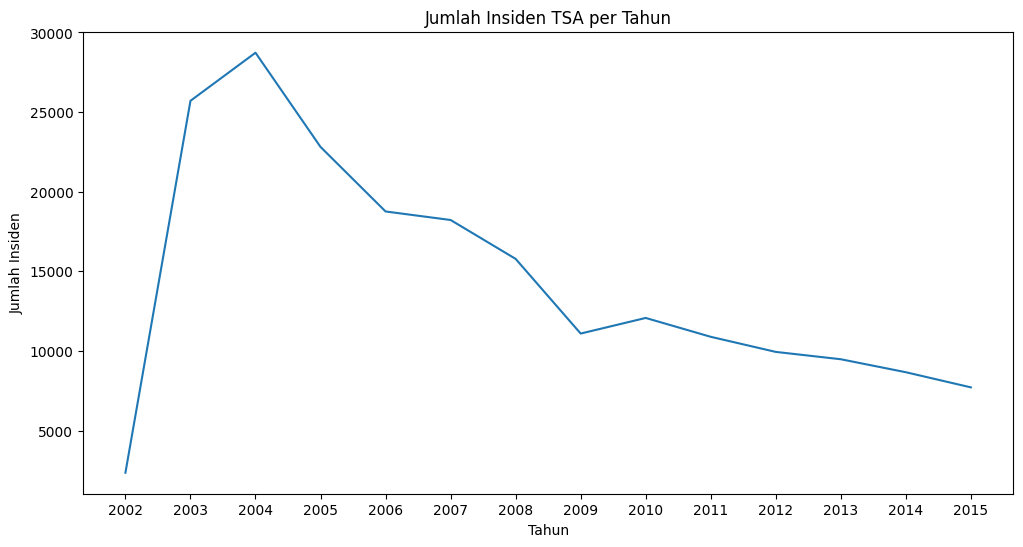

In [161]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_trend_year, x='Tahun', y= 'Jumlah Insiden')
plt.title('Jumlah Insiden TSA per Tahun')
plt.show()

* Secara jumlah, jika dilihat tren per tahun nya Insiden TSA memiliki nilai **tertinggi** di tahun **2004** dengan jumlah insiden **28.727**. Hal ini dikarenakan menurut artikel yang dimuat pada laman [The New York Times](https://www.nytimes.com/2004/09/10/politics/us-to-pay-fliers-15-million-for-pilfering-of-checked-bags.html), pada tahun **2004** pemeriksaan TSA mulai dilakukan secara tertutup yang menyebabkan banyak barang penumpang yang hilang dan rusak. Dimana hal itu kemungkinan dikarenakan karena pencurian agen TSA itu sendiri.

* Setelah mencapai titik tertinggi, jumlah klaim kemudian mengalami tren menurun hingga mencapai titik paling rendah (kedua setelah tahun **2002**) pada tahun **2015**. Hal ini dikarenakan menurut dokumen dari [reason.org](https://reason.org/wp-content/uploads/files/ee580fb1515e98c9bd64e9aa5ea18ed3.pdf) TSA mulai mengimplementasikan peningkatan pelayanan dengan melakukan training kepada agen TSA yang melakukan pemeriksaan, serta melalukan kerjasama dengan dengan vendor untuk screening.



In [162]:
df_trend = df_year.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Rata-rata Jumlah Insiden'})
df_trend['Month Number'] = df_trend['Month'].dt.month
df_trend['Month'] = df_trend['Month'].astype('str')

df_trend_month = df_trend.groupby('Month Number')['Rata-rata Jumlah Insiden'].mean().to_frame().reset_index()
df_trend_month = df_trend_month.rename(columns={'Month Number': 'Month'})

df_trend_month.sort_values('Rata-rata Jumlah Insiden',ascending=False)

,Month,Rata-rata Jumlah Insiden
7,8,1301.142857
6,7,1284.857143
11,12,1269.071429
4,5,1248.571429
5,6,1241.642857
2,3,1233.285714
0,1,1223.428571
9,10,1179.500000
3,4,1166.142857
8,9,1143.857143


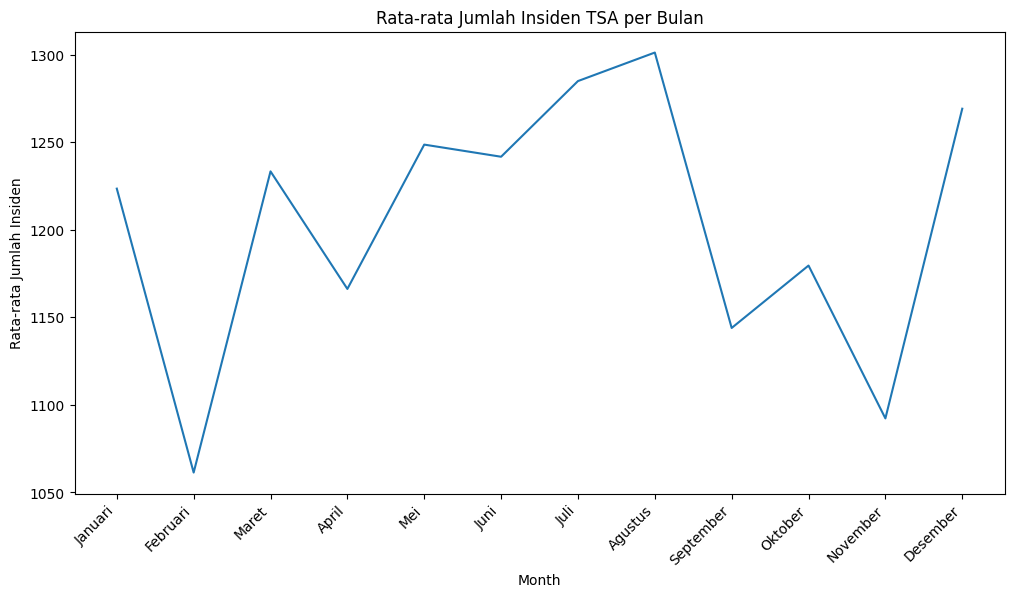

In [163]:
plt.figure(figsize=(12,6))
sns.lineplot(data= df_trend_month, x = 'Month', y = 'Rata-rata Jumlah Insiden')
plt.xticks(range(1,13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli','Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation= 45, ha = 'right')
plt.title('Rata-rata Jumlah Insiden TSA per Bulan')
plt.show()

Secara rata-rata, insiden cenderung banyak pada tengah tahun (**Juli** & **Agustus**) yang bertepatan dengan libur musim panas dan akhir tahun (**Desember**) yang bertepatan dengan libur musim dingin. Banyak penduduk Amerika Serikat yang melakukan perjalanan untuk berlibur pada kurun waktu tersebut. Kemudian saat liburan juga cenderung membawa barang yang banyak sehingga potensi terjadinya insiden TSA juga tinggi.

#### 2. Di bandara mana sebagian besar insiden terjadi?

Akan ditinjau bandara tempat terjadinya insiden melalui kolom `Airport Code` & `Airport Name`.

In [164]:
df_airport = df.groupby(['Airport Code', 'Airport Name'])['Claim Number'].count().to_frame().reset_index()
df_airport = df_airport.rename(columns={'Claim Number':'Jumlah Insiden'})
df_airport['Persentase'] = df_airport['Jumlah Insiden']/sum(df_airport['Jumlah Insiden'])*100
df_airport = df_airport.sort_values('Jumlah Insiden', ascending=False).head(5)
df_airport

,Airport Code,Airport Name,Jumlah Insiden,Persentase
245,LAX,Los Angeles International Airport,18062,8.931415
231,JFK,John F. Kennedy International,9157,4.528013
137,EWR,Newark International Airport,6797,3.361025
320,ORD,Chicago O'Hare International Airport,6770,3.347673
287,MIA,Miami International Airport,6369,3.149384


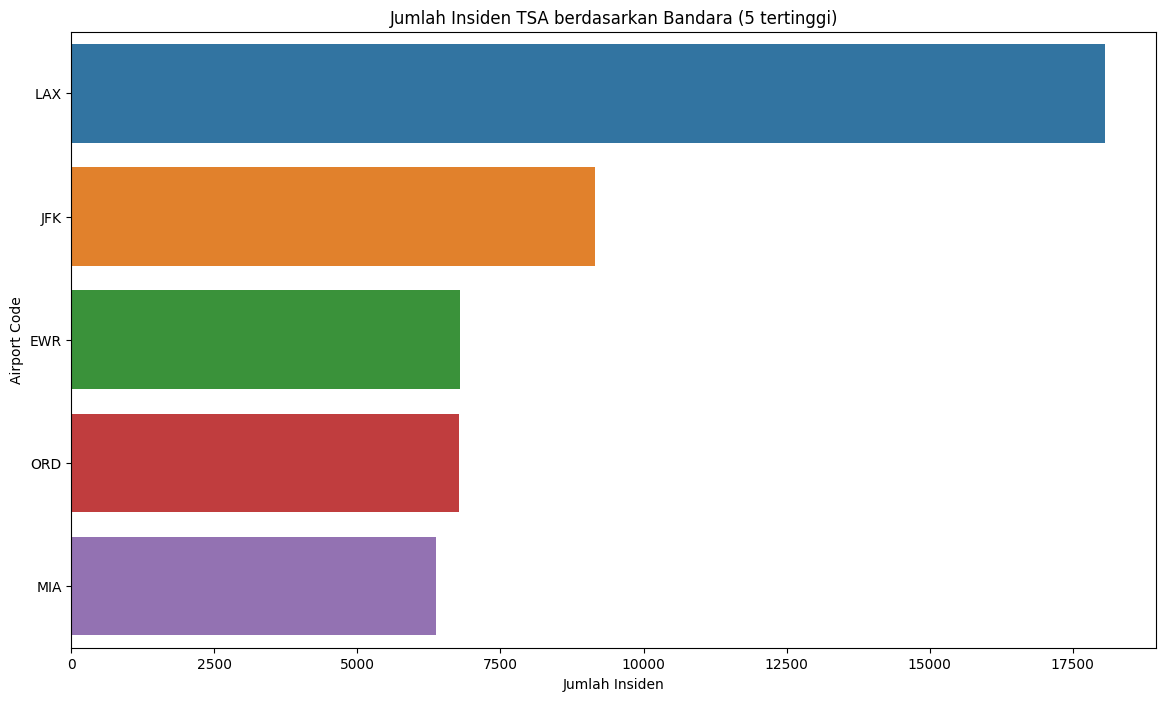

In [165]:
plt.figure(figsize=(14,8))
fig = sns.barplot(data= df_airport, y = 'Airport Code', x = 'Jumlah Insiden', orient='horizontal')
plt.title('Jumlah Insiden TSA berdasarkan Bandara (5 tertinggi)')
plt.show()

Berdasarkan bandara, insiden paling banyak terjadi di Bandara Internasional Los Angeles (LAX) dimana **8,93%** insiden, diikuti oleh JFK, FWR, ORD, MIA. Bandara LAX merupakan bandara tersibuk ke 5 di dunia dengan total penumpang yang singgah di bandara ini mencapai 60,688,609 orang pada tahun 2004 menurut sumber dari laman [Wikipedia](https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic_(2000%E2%80%932009)).


#### 3. Pesawat apa yang paling sering mengalami insiden?

Akan ditinjau pesawat yang mengalami insiden melalui kolom `Airline Name`.

In [166]:
df_airline = df.groupby(['Airline Name'])['Claim Number'].count().to_frame().reset_index()
df_airline = df_airline.rename(columns={'Claim Number':'Jumlah Insiden'})
df_airline['Persentase'] = df_airline['Jumlah Insiden']/sum(df_airline['Jumlah Insiden'])*100
df_airline = df_airline.sort_values('Jumlah Insiden', ascending=False).head()
df_airline

,Airline Name,Jumlah Insiden,Persentase
53,American Airlines,36044,17.823271
96,Delta Air Lines,29007,14.343569
196,Southwest Airlines,28809,14.245661
215,UAL,22759,11.254018
218,USAir,14961,7.398012


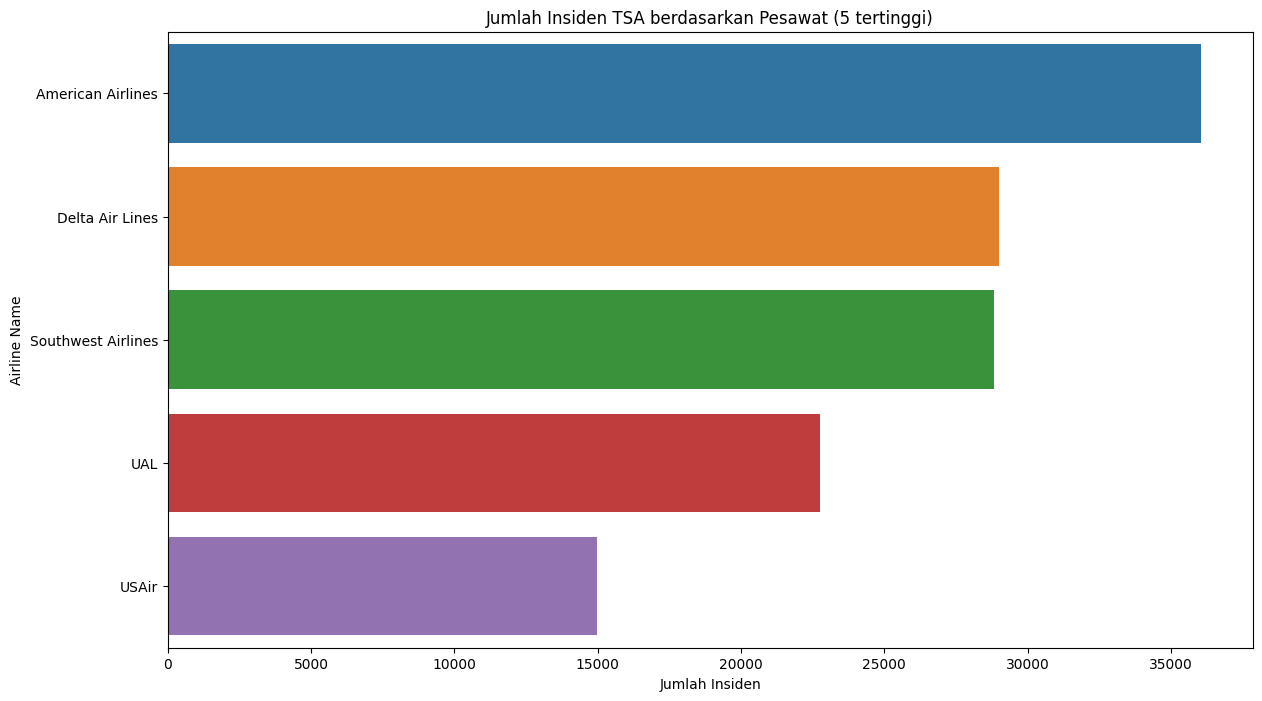

In [167]:
plt.figure(figsize=(14,8))
fig = sns.barplot(data= df_airline, y = 'Airline Name', x = 'Jumlah Insiden', orient='horizontal')
plt.title('Jumlah Insiden TSA berdasarkan Pesawat (5 tertinggi)')
plt.show()

Penumpang pesawat **American Airlines** menjadi yang paling banyak mengalami insiden TSA, yaitu **17,82%** dari total keseluruhan insiden, diikuti **Delta Air Lines**, **Soutwest Airlines**, dan **UAL**. Keempat maskapai udara tersebut memang merupakan maskapai yang banyak digunakan oleh penumpang. Menurut [Wikipedia](airlines), Keempat maskapai tersebut masuk dalam 10 besar maskapai dengan penumpang terbanyak.

#### 4. Tipe klaim apa yang paling banyak terjadi insiden?

Akan ditinjau tipe klaim yang mengalami insiden melalui kolom `Claim Type`.

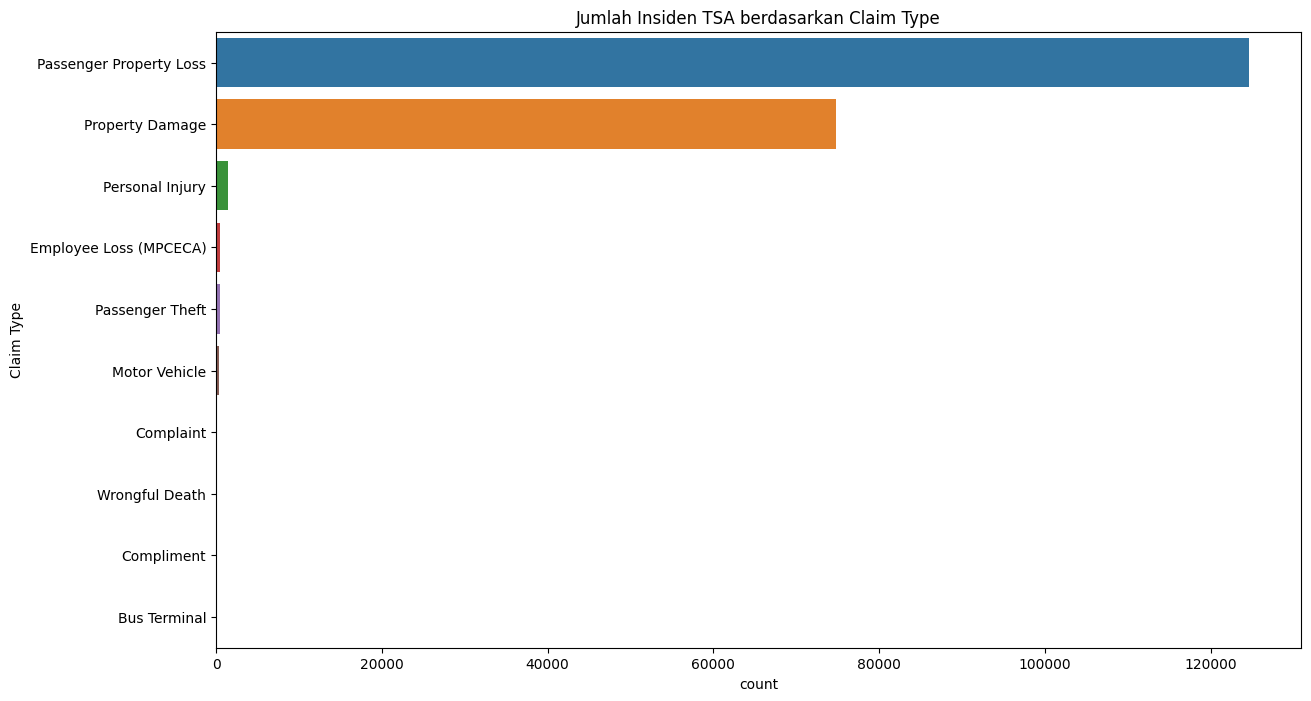

In [168]:
plt.figure(figsize=(14,8))
sns.countplot(data= df, y = 'Claim Type', order=df['Claim Type'].value_counts().index, orient='horizontal')
plt.title('Jumlah Insiden TSA berdasarkan Claim Type')
plt.show()

In [169]:
df['Claim Type'].value_counts()

Passenger Property Loss    124648
Property Damage             74774
Personal Injury              1440
Employee Loss (MPCECA)        477
Passenger Theft               452
Motor Vehicle                 385
Complaint                      46
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [170]:
df['Claim Type'].value_counts()/len(df)*100

Passenger Property Loss    61.636750
Property Damage            36.974732
Personal Injury             0.712061
Employee Loss (MPCECA)      0.235870
Passenger Theft             0.223508
Motor Vehicle               0.190377
Complaint                   0.022746
Wrongful Death              0.001978
Compliment                  0.001483
Bus Terminal                0.000494
Name: Claim Type, dtype: float64

Klaim yang diajukan sangat didominasi oleh 2 tipe saja, yaitu **kehilangan barang** (`Passenger Property Loss`) & **kerusakan barang** (`Property Damage`) dimana kedua tipe tersebut sebesar **98,61%** dari total jumlah klaim. Hasil ini mengerucutkan bahwa **sebagian besar insiden TSA terjadi pada barang bawaan**. Seperti yang telah dijelaskan sebelumnya, **hilangnya** barang bisa disebabkan karena pemeriksaan TSA mulai dilakukan secara **tertutup** & terjadi **pencurian** oleh **agen TSA** itu sendiri.

#### 5. Lokasi site klaim mana yang paling banyak terjadi insiden?

Akan ditinjau lokasi site terjadinya insiden melalui kolom `Claim Site`.

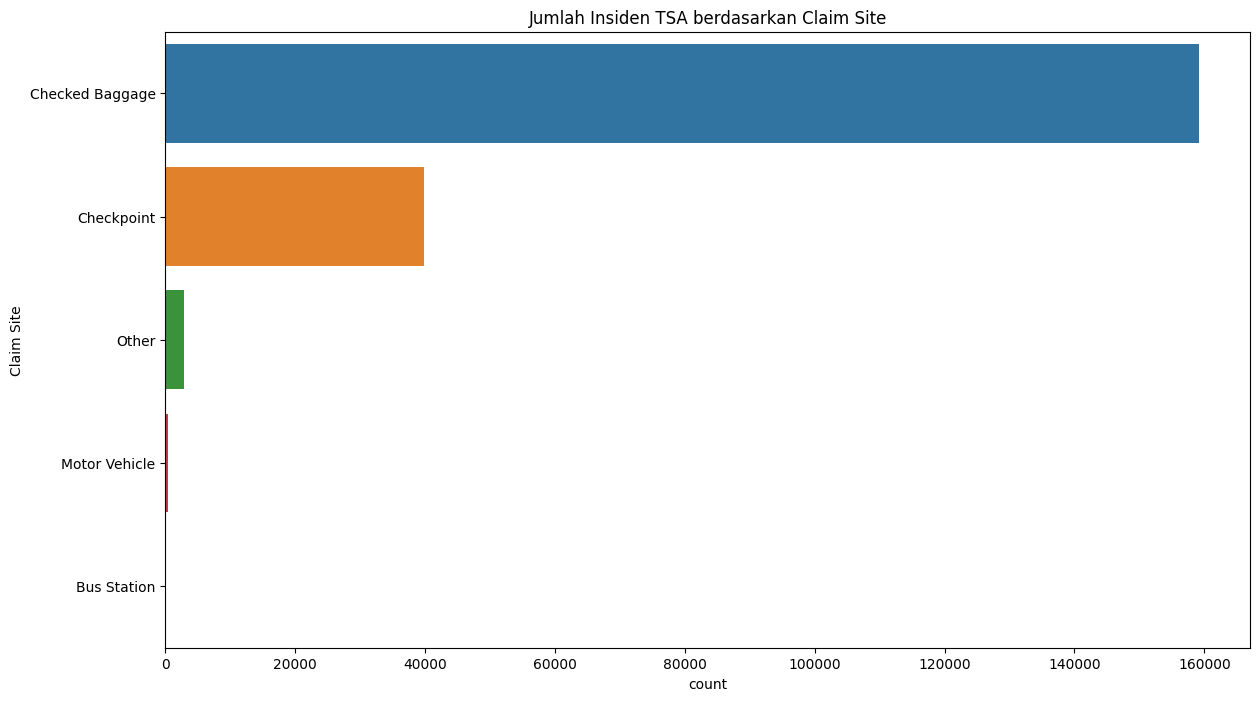

In [171]:
plt.figure(figsize=(14,8))
sns.countplot(data= df, y = 'Claim Site', order=df['Claim Site'].value_counts().index, orient='horizontal')
plt.title('Jumlah Insiden TSA berdasarkan Claim Site')
plt.show()

In [172]:
df['Claim Site'].value_counts()

Checked Baggage    159114
Checkpoint          39775
Other                2840
Motor Vehicle         485
Bus Station            16
Name: Claim Site, dtype: int64

In [173]:
df['Claim Site'].value_counts()/len(df)*100

Checked Baggage    78.679721
Checkpoint         19.668200
Other               1.404342
Motor Vehicle       0.239826
Bus Station         0.007912
Name: Claim Site, dtype: float64

Sebagian besar insiden terjadi di **pengecekan bagasi** (`Checked Baggage`) & `Checkpoint` dengan total persentase **98,35%**. Kedua lokasi ini banyak terjadi insiden karena semua penumpang harus menyerahkan barang bawaan mereka untuk dilakukan pemeriksaan di kedua lokasi tersebut, di lain sisi tidak semua penumpang menggunakan kendaraan bermotor atau naik bus bus. Oleh karena itu, wajar jika kedua situs ini memiliki lebih banyak insiden daripada situs klaim lainnya.

Kemudian kita lihat hubungan nya dengan `Claim Type`.

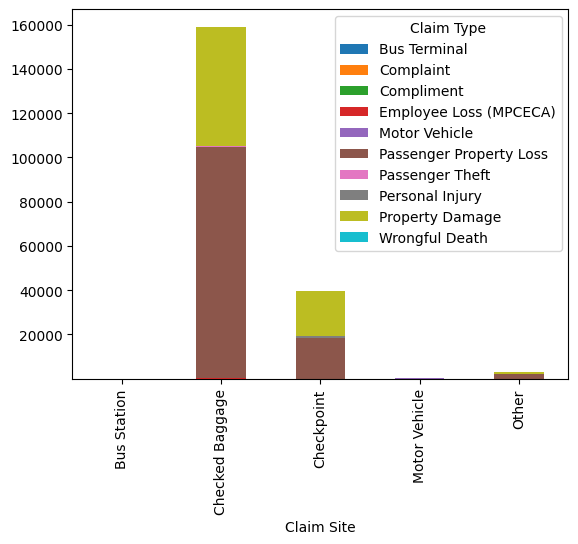

<Figure size 1400x800 with 0 Axes>

In [238]:
new = df[['Claim Type', 'Claim Site']]
count_claimtype = df['Claim Type'].value_counts()
crosstab = pd.crosstab( index=df['Claim Site'], columns=df['Claim Type'])
crosstab.plot(kind="bar", stacked=True, rot=90)
plt.figure(figsize=(14,8))
plt.show()

In [239]:
crosstab

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death
Claim Site,,,,,,,,,,
Bus Station,0,0,0,0,0,9,0,0,7,0
Checked Baggage,1,20,1,379,26,104232,386,246,53823,0
Checkpoint,0,22,2,64,9,18226,65,978,20409,0
Motor Vehicle,0,0,0,19,339,10,1,67,48,1
Other,0,4,0,15,11,2171,0,149,487,3


In [240]:
df['Claim Site'].value_counts()

Checked Baggage    159114
Checkpoint          39775
Other                2840
Motor Vehicle         485
Bus Station            16
Name: Claim Site, dtype: int64

Dari plot grafik diatas, dapat terlihat bahwa site klaim terbanyak (`Checked Baggage`) juga sebagian besar (**65,51%**) terdiri dari tipe klaim terbanyak (`Passenger Property Loss`). Sementara untuk site klaim `Checkpoint`, tipe klaim `Property Damage` memiliki jumlah yang sedikit lebih banyak, dengan persentase **51,31%**.

#### 6. Barang apa yang paling banyak diajukan klaim terhadap insiden?

Akan ditinjau barang yang paling banyak diajukan klaim melalui kolom `Item` yang sudah di binning ke kolom`Item Group`.

In [245]:
item_dict['Other'] = ['']
df_item = pd.DataFrame()

for i, j in item_dict.items():
    item = i
    val = df['Item Group'].str.contains(i).sum()
    baris = pd.DataFrame([[item, val,]], columns=['Item', 'Jumlah Klaim'])
    df_item = pd.concat([df_item, baris], ignore_index= True)

df_item = df_item.sort_values('Jumlah Klaim', ascending=False)
df_item['Persentase'] = df_item['Jumlah Klaim']/len(df)*100
df_item

,Item,Jumlah Klaim,Persentase
12,Other,47784,23.628542
5,Accessories,43871,21.693616
4,Electronic,41624,20.582505
3,Lock,31483,15.567918
0,Luggage,31459,15.556050
1,Clothing,25309,12.514958
2,Jewelry,18068,8.934382
8,Tools,12397,6.130149
6,Cosmetic & Medicine,12320,6.092073
10,Watches,7010,3.466350


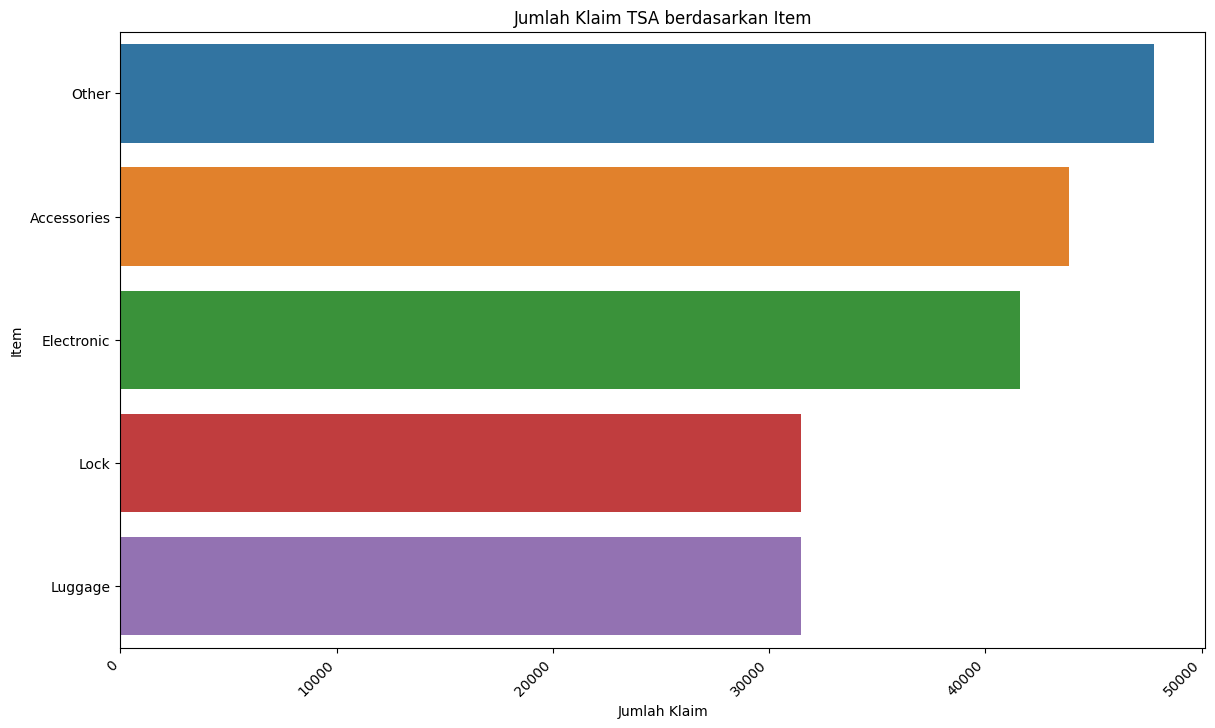

In [246]:
plt.figure(figsize=(14,8))
fig = sns.barplot(data= df_item.head(), y = 'Item', x = 'Jumlah Klaim', orient='horizontal')
plt.xticks(rotation= 45, ha = 'right')
plt.title('Jumlah Klaim TSA berdasarkan Item')
plt.show()

Selain kategori `Other`, barang yang paling banyak di klaim karena insiden TSA adalah `Accessories` & `Electronic` dengan persentase masing-masing **21,69%** & **20,58%**. Kedua barang tersebut, merupakan salah satu [starter pack](https://www.stylecraze.com/articles/what-to-pack-for-a-trip/) yang biasa dibawa traveller ketika bepergian. Accessories seperti eyewear and sunglasses merupakah barang [fragile](https://www.catsa-acsta.gc.ca/en/what-can-bring/item/fragile-items) yang mudah pecah/rusak/patah jika penganganan nya tidak benar. Sehingga tidak mengherankan jika persentasenya tinggi. Kemudian barang elektronik juga barang yang mudah rusak, seperti HP & laptop yang layar nya mudah pecah jika terjatuh dari ketinggian atau terbentur benda keras.

#### 7. Bagaimana klaim diselesaikan?

Akan ditinjau bagaimana klaim diselesaikan melalui kolom `Disposition`.

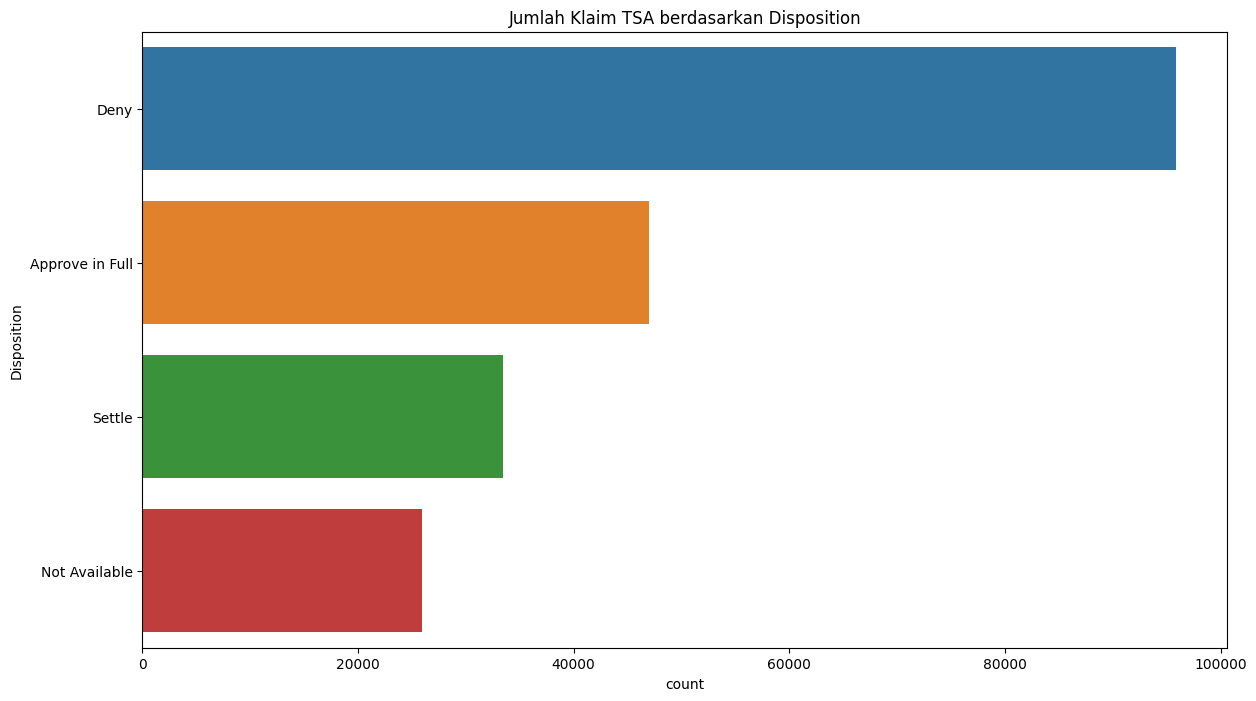

In [178]:
plt.figure(figsize=(14,8))
sns.countplot(data= df, y = 'Disposition', order=df['Disposition'].value_counts().index, orient='horizontal')
plt.title('Jumlah Klaim TSA berdasarkan Disposition')
plt.show()

In [179]:
df['Disposition'].value_counts()

Deny               95843
Approve in Full    46991
Settle             33424
Not Available      25972
Name: Disposition, dtype: int64

In [180]:
df['Disposition'].value_counts()/len(df)*100

Deny               47.393067
Approve in Full    23.236414
Settle             16.527716
Not Available      12.842803
Name: Disposition, dtype: float64

Secara total, hampir setengah klaim (**47,39%**) ditolak oleh TSA. Kemudian yang diterima **23,24%** & yang disesuaikan **16,53%**.

Kemudian akan kita tinjau tren per tahun nya.

In [181]:
df.insert(3, 'Incident Year', value='')
df['Incident Year'] = df['Incident Date'].dt.year
df.head()

,Claim Number,Date Received,Incident Date,Incident Year,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
4416,0401107L,2003-04-01,2003-02-20,2003,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,Lock,20.00,Approve in Full,20.000,Approve in Full,Approved or Settled
4481,0401004L,2003-04-01,2002-11-29,2002,RSW,Southwest Florida International,Delta Air Lines,Property Damage,Checkpoint,Cameras - Digital,Electronic,120.00,Settle,40.000,Settle,Approved or Settled
4479,0401002L,2003-04-01,2003-02-16,2003,LGA,LaGuardia,American Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,Clothing;Accessories,550.00,Settle,275.000,Settle,Approved or Settled
4478,0401128L,2003-04-01,2003-03-09,2003,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,Other,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available
4477,0401127L,2003-04-01,2003-03-09,2003,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Other,Other,89.99,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,44.995,Not Available,Denied or Not Available


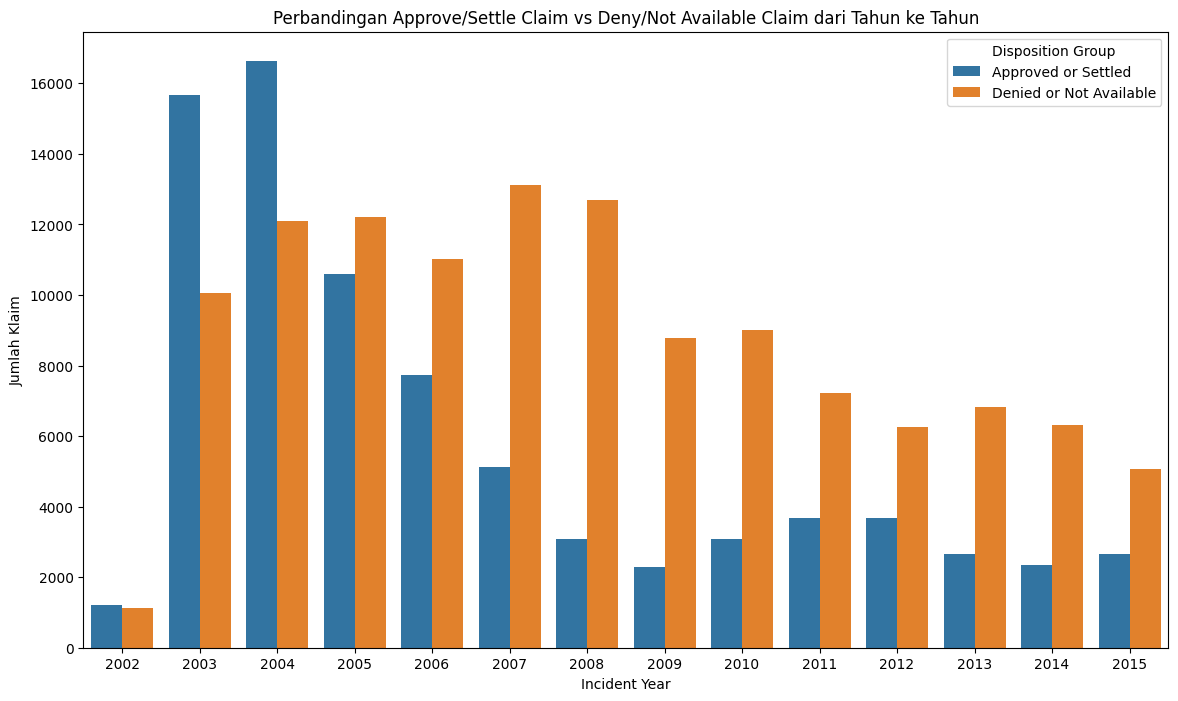

In [182]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, x = 'Incident Year', hue='Disposition Group')
plt.ylabel('Jumlah Klaim')
plt.title('Perbandingan Approve/Settle Claim vs Deny/Not Available Claim dari Tahun ke Tahun')

plt.show()

In [183]:
df[df['Incident Year']==2004]['Disposition Group'].value_counts()

Approved or Settled        16633
Denied or Not Available    12094
Name: Disposition Group, dtype: int64

In [247]:
df[df['Incident Year']==2007]['Disposition Group'].value_counts()

Denied or Not Available    13112
Approved or Settled         5112
Name: Disposition Group, dtype: int64

In [184]:
df[df['Incident Year']==2009]['Disposition Group'].value_counts()

Denied or Not Available    8793
Approved or Settled        2301
Name: Disposition Group, dtype: int64

Jumlah klaim yang disetujui/diselesaikan tertinggi di **2004** dan terus menurun hingga **2009**. Kemudian, jumlah klaim yang disetujui atau diselesaikan cenderung **stabil** hingga tahun **2015**. Jika dilihat dari perbandingan nya dengan klaim yang ditolak/tidak ada keterangan, klaim yang disetujui/diselesaikan memiliki jumlah yang lebih banyak dari tahun 2004 & sebelumnya, dan klaim yang ditolak/tidak ada keterangan memiliki jumlah yang lebih banyak pada tahun 2005 & setelahnya. Hal ini menunjukkan bahwa sistem klaim sudah menunjukkan arah yang lebih baik secara jumlah.

### **Bagaimana ciri-ciri klaim yang memiliki nilai `Close Amount` yang lebih tinggi?**

Untuk menjawab dengan pertanyaan, kami akan membuat beberapa sub-pertanyaan:

1. Berapa yang dibayarkan untuk klaim yang disetujui dan diselesaikan?
2. Tipe klaim manakah yang memiliki rata-rata jumlah pembayaran tertinggi?
3. Lokasi site klaim mana yang memiliki jumlah pembayaran rata-rata tertinggi?
4. Item mana yang memiliki rata-rata jumlah pembayaran tertinggi?

Pada bagian ini, hanya akan digunakan `Disposition` yang memiliki values `Approved` atau `Settled` karena tujuan analisis ini adalah untuk menemukan karakteristik klaim yang benar-benar dibayarkan.

#### 1. Berapa yang dibayarkan untuk klaim yang disetujui dan diselesaikan?

Akan ditinjau nilai klaim yang dibayarkan melalui kolom `Close Amount`. Namun sebelumnya, kita buat df yang hanya mencakup Disposition `Approve` & `Settle`.

In [185]:
df_approve_settle = df[df['Disposition Group']=='Approved or Settled']
display(df_approve_settle.shape,df_approve_settle.head(),df_approve_settle.tail())

(80415, 16)

,Claim Number,Date Received,Incident Date,Incident Year,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
4416,0401107L,2003-04-01,2003-02-20,2003,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,Lock,20.00,Approve in Full,20.0,Approve in Full,Approved or Settled
4481,0401004L,2003-04-01,2002-11-29,2002,RSW,Southwest Florida International,Delta Air Lines,Property Damage,Checkpoint,Cameras - Digital,Electronic,120.00,Settle,40.0,Settle,Approved or Settled
4479,0401002L,2003-04-01,2003-02-16,2003,LGA,LaGuardia,American Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,Clothing;Accessories,550.00,Settle,275.0,Settle,Approved or Settled
4482,0401005L,2003-04-01,2003-02-20,2003,MSY,New Orleans International,Southwest Airlines,Property Damage,Checked Baggage,Other,Other,50.00,Settle,25.0,Settle,Approved or Settled
4483,0401010L,2003-04-01,2003-02-14,2003,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),Luggage;Lock,419.38,Settle,210.0,Settle,Approved or Settled


,Claim Number,Date Received,Incident Date,Incident Year,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Item Group,Claim Amount,Status,Close Amount,Disposition,Disposition Group
97224,0806105M,2003-08-16,2003-07-24,2003,SJC,Norman Y Mineta San Jose International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,Clothing;Accessories,90.00,Settle,63.0,Settle,Approved or Settled
97225,0813013M,2003-08-05,2003-07-13,2003,SMF,Sacramento International Airport,Southwest Airlines,Property Damage,Checked Baggage,Other,Other,50.00,Settle,25.0,Settle,Approved or Settled
97226,0825021M,2003-08-26,2003-08-03,2003,PDX,Portland International,Alaska Airlines,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,Cosmetic & Medicine,477.00,Settle,238.5,Settle,Approved or Settled
97227,0909824M,2002-10-30,2002-10-07,2002,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Other,Other,1190.15,Settle,755.8,Settle,Approved or Settled
97230,21525,2002-12-18,2002-11-25,2002,LGA,LaGuardia,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,Electronic,2200.00,Settle,1197.0,Settle,Approved or Settled


In [186]:
df_approve_settle[['Close Amount']].describe()

,Close Amount
count,80415.000000
mean,175.983525
std,793.018581
min,0.000000
25%,31.415000
50%,69.950000
75%,166.250000
max,125000.000000


Kita tinjau total `Close Amount` per Tahun untuk klaim yang disetujui / diselesaikan.

C:\Users\ACER\AppData\Local\Temp\ipykernel_18428\1276918487.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data= df_approve_settle, x = 'Incident Year', y = 'Close Amount', estimator=sum, ci=0)


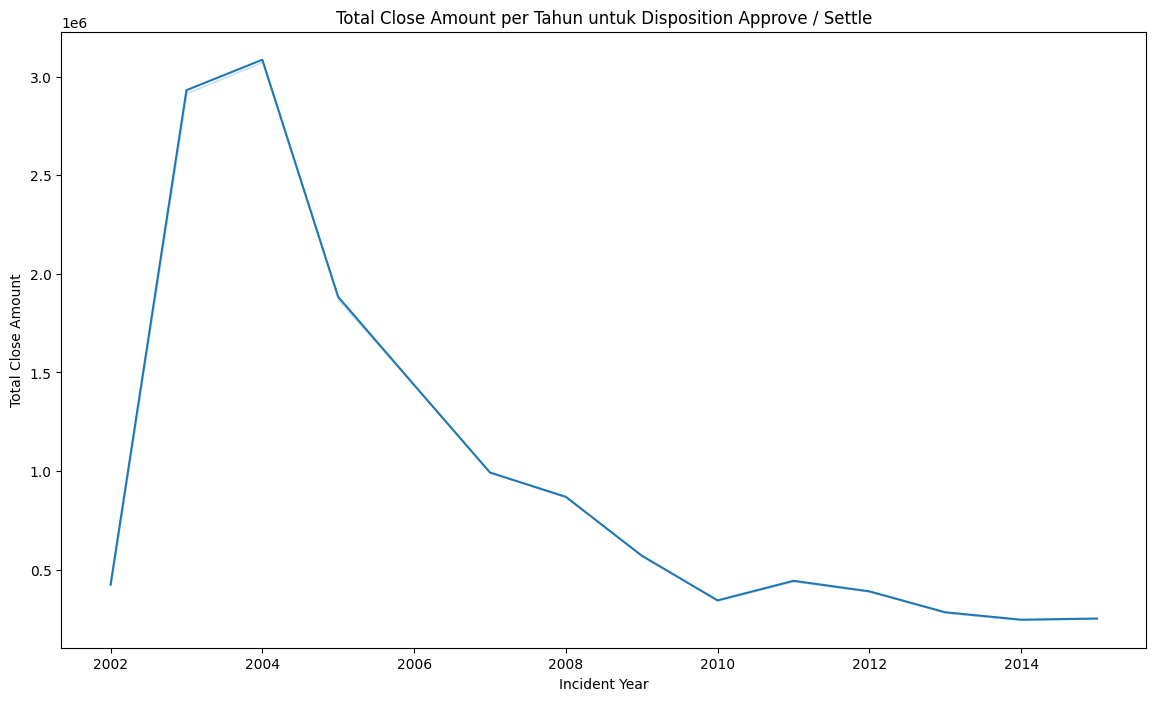

In [187]:
plt.figure(figsize=(14,8))
sns.lineplot(data= df_approve_settle, x = 'Incident Year', y = 'Close Amount', estimator=sum, ci=0)
plt.ylabel('Tahun')
plt.ylabel('Total Close Amount')
plt.title('Total Close Amount per Tahun untuk Disposition Approve / Settle')
plt.show()

Nominal pembayaran klaim mencapai titik tertinggi di angka **$3M** pada tahun **2004** kemudian terus menurun hingga tahun **2015**. Nominal klaim yang dibayarkan untuk klaim yang disetujui atau diselesaikan memiliki tren yang sama dengan jumlah klaim yang disetujui atau diselesaikan. Kita juga dapat melihat dari statistik, **jumlah terendah** yang dibayarkan untuk klaim adalah **$0**, sedangkan **tertinggi** adalah **$125000**, dan **rata-rata** **$175,98**. Ini menandakan nominal `Close Amount` benar-benar tersebar nilai nya.

#### 2. Tipe klaim manakah yang memiliki rata-rata jumlah pembayaran tertinggi?

Akan ditinjau tipe klaim tertinggi yang dibayarkan melalui kolom `Claim Type`.

##### `Claim Type` Tertinggi

In [188]:
df_approve_settle.groupby('Claim Type').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,70.000000,NaN,70.00,70.00000,70.000,70.0000,70.00
Complaint,5.0,34.835000,32.662840,12.50,18.80000,25.000,25.3750,92.50
Employee Loss (MPCECA),271.0,166.390461,273.535125,3.08,29.97250,80.670,200.0000,2929.51
Motor Vehicle,202.0,1232.174455,1456.459039,10.00,403.16375,869.705,1404.6125,11672.23
Passenger Property Loss,43507.0,164.885371,376.699283,0.00,26.50000,71.000,174.9900,16000.00
Passenger Theft,247.0,236.946842,702.989649,5.39,49.99500,89.950,201.7000,9999.99
Personal Injury,247.0,3613.834636,12161.838355,0.00,283.35000,750.000,2500.0000,125000.00
Property Damage,35935.0,159.528845,345.208252,0.00,37.50000,65.000,150.0000,15000.00


In [189]:
print(f'Rata-rata Close Amount Tertinggi berdasarkan Tipe Klaim untuk Disposition Approve / Settle')
for i in df_approve_settle['Claim Type'].unique():
    mean = df_approve_settle[df_approve_settle['Claim Type'] == i]['Close Amount'].mean()
    print(f'{i}: {mean}')

Rata-rata Close Amount Tertinggi berdasarkan Tipe Klaim untuk Disposition Approve / Settle
Passenger Property Loss: 164.88537097478567
Property Damage: 159.52884485877277
Personal Injury: 3613.83463562753
Employee Loss (MPCECA): 166.39046125461255
Motor Vehicle: 1232.1744554455445
Passenger Theft: 236.94684210526313
Complaint: 34.835
Bus Terminal: 70.0


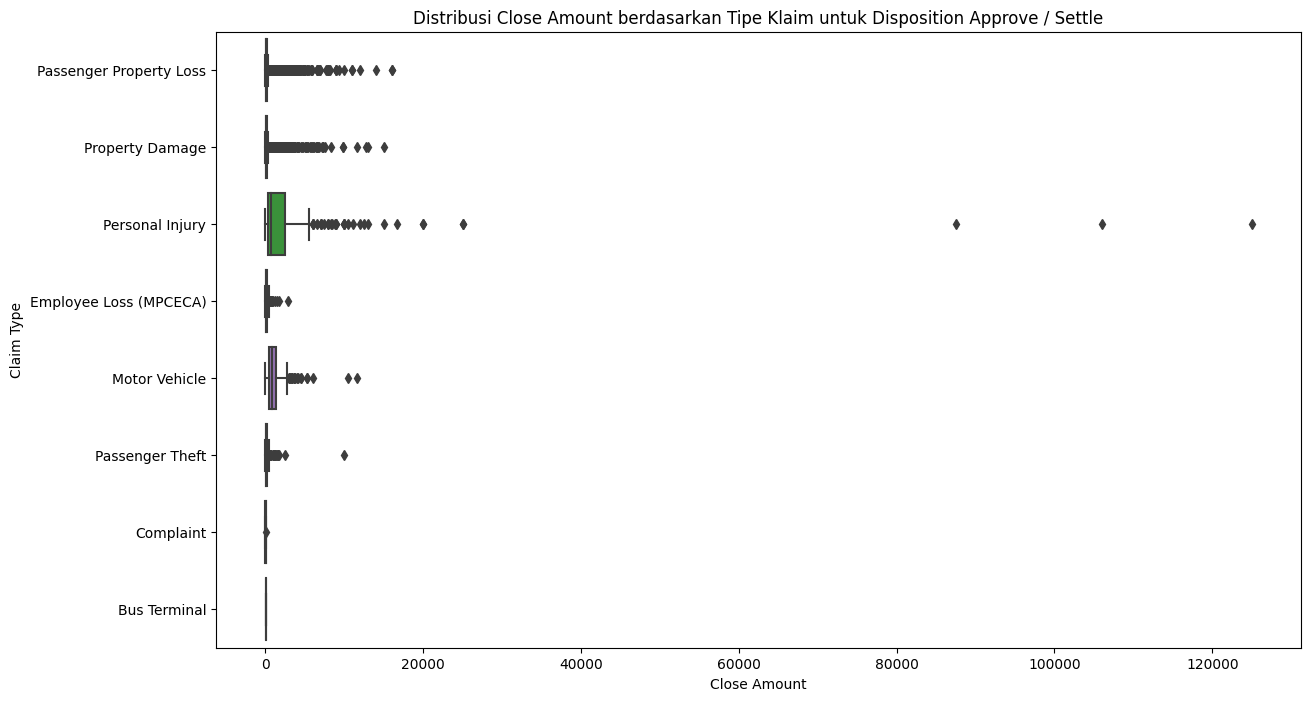

In [190]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df_approve_settle, y='Claim Type', x='Close Amount')
plt.title('Distribusi Close Amount berdasarkan Tipe Klaim untuk Disposition Approve / Settle')
plt.show()

**Uji Hipotesis**

Berdasarkan [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), rata-rata distribusi sampel mendekati distribusi normal jika ukuran sampel sama dengan atau lebih besar dari 30. Itu sebabnya kami memilih untuk menggunakan [ANOVA](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/):
* **H0**: Semua jenis klaim memiliki rata-rata jumlah yang hampir sama<br>
* **H1**: Setidaknya satu jenis klaim memiliki rata-rata jumlah dekat yang berbeda

In [191]:
claim_type = df['Claim Type'].unique()
stats, pvalue = f_oneway(*[df_approve_settle[df_approve_settle['Claim Type'] == i]['Close Amount'] for i in claim_type])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. 
    Terima H0
    ''')
else:
    print(f'''
    pvalue = {pvalue}.
    Tolak H0
    ''')


    pvalue = nan.
    Tolak H0
    


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Tipe klaim `Personal Injury` memiliki jumlah rata-rata tertinggi klaim yang dibayarkan sebesar **$3614**, diikuti oleh `Motor Vehicle` dengan **$1232**. Hal ini dibuktikan dengan uji ANOVA bahwa paling tidak ada satu jenis klaim memiliki nilai rata-rata yang berbeda. Meskipun hanya ada sedikit insiden dengan jenis klaim ini, namun jumlah yang dibayarkan jauh lebih tinggi daripada `Passenger Property Loss` & `Property Damage` yang memiliki frekuensi insiden yang lebih tinggi.

Dari grafik boxplot diatas, didapati bahwa outlier memang [True Outlier](https://godatadrive.com/blog/outliers-101#:~:text=True%20Outlier%3A%20Outliers%20that%20are,many%20reasons%20behind%20their%20existence.). Jika dilihat dari persebaran data nya, masuk akal jika `Personal Injury` memiliki `Close Amount` yang lebih tinggi. Oleh karena itu, untuk analisis ini akan digunakan **Rata-rata** agar dapat mewakili karakteristik sebenarnya dari dataset.

##### Kapan sebagian besar insiden `Personal Injury` terjadi?

Kita akan membuat df yang hanya berisi tipe klaim `Personal Injury` terlebih dahulu.

In [192]:
df_personal_injury = df[df['Claim Type'] == 'Personal Injury']

Kemudian kita hitung rata-rata insiden `Personal Injury` setiap bulan.

In [193]:
df_trend_personal_injury = df_personal_injury.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
df_trend_personal_injury = df_trend_personal_injury.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
df_trend_personal_injury['Month Number'] = df_trend_personal_injury['Month'].dt.month
df_trend_personal_injury['Month'] = df_trend_personal_injury['Month'].astype('str')

df_trend_month_personal_injury = df_trend_personal_injury.groupby('Month Number')['Number of Incidents'].mean().to_frame().reset_index()
df_trend_month_personal_injury = df_trend_month_personal_injury.rename(columns={'Month Number': 'Month'})

df_trend_month_personal_injury.sort_values('Number of Incidents',ascending=False)

,Month,Number of Incidents
7,8,10.428571
5,6,10.307692
11,12,9.642857
6,7,9.214286
2,3,9.142857
4,5,8.642857
10,11,8.571429
1,2,8.000000
9,10,7.928571
0,1,7.846154


Kemudian kita buat line plot untuk melihat trend nya.

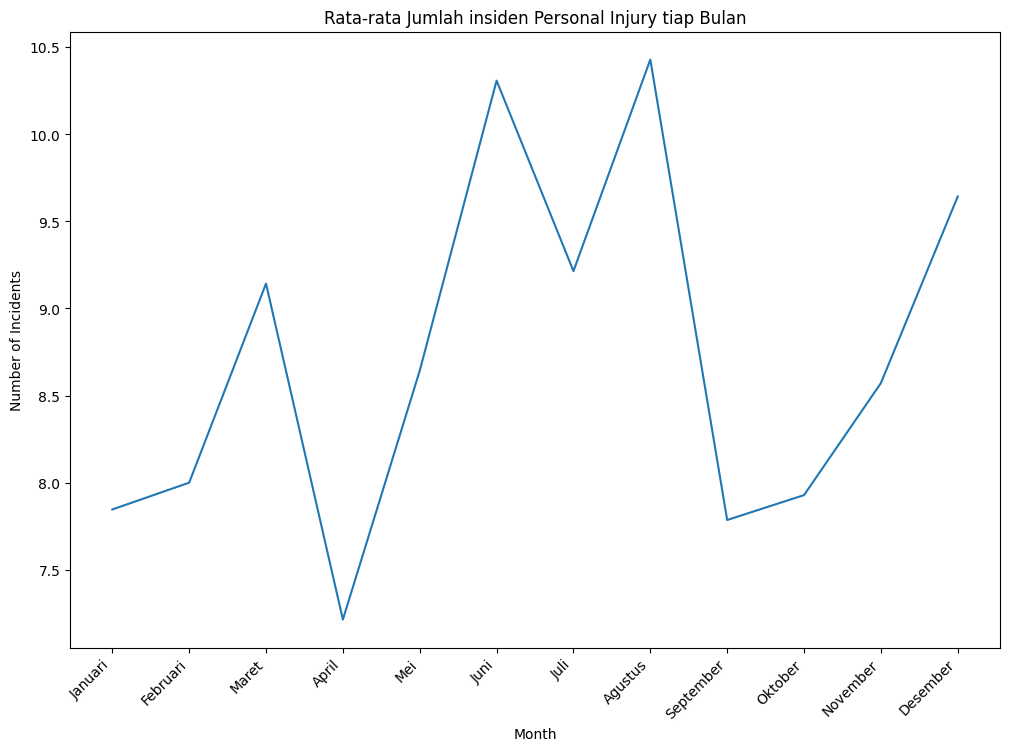

In [194]:
plt.figure(figsize=(12,8))
sns.lineplot(data= df_trend_month_personal_injury, x = 'Month', y = 'Number of Incidents')
plt.xticks(range(1,13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli','Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation= 45, ha = 'right')

plt.title('Rata-rata Jumlah insiden Personal Injury tiap Bulan')
plt.show()

Tipe klaim `Personal Injury` kebanyakan terjadi pada **Juni** & **Agustus** dengan rata-rata insiden **10,31 kali** & **10,43 kali**. Sementara itu, bulan dengan insiden `Personal Injury` paling sedikit adalah **April** dengan rata-rata insiden **7,21 kali**.

##### Di bandara mana sebagian besar insiden `Personal Injury` terjadi?

Akan ditinjau berdasarkan kolom `Airport Code`. Dimana kita akan langsung hitung persentase nya & plot menggunakan bar plot.

In [195]:
df_personal_injury_by_airport = df_personal_injury.groupby('Airport Code')['Claim Number'].count().to_frame().reset_index()
df_personal_injury_by_airport = df_personal_injury_by_airport.rename(columns={'Claim Number':'Jumlah Insiden'})
df_personal_injury_by_airport['Persentase'] = df_personal_injury_by_airport['Jumlah Insiden']/sum(df_personal_injury_by_airport['Jumlah Insiden'])*100

df_personal_injury_by_airport = df_personal_injury_by_airport.sort_values('Jumlah Insiden', ascending=False).head()
df_personal_injury_by_airport

,Airport Code,Jumlah Insiden,Persentase
89,LAX,93,6.458333
84,JFK,51,3.541667
97,MCO,50,3.472222
121,PHX,48,3.333333
88,LAS,48,3.333333


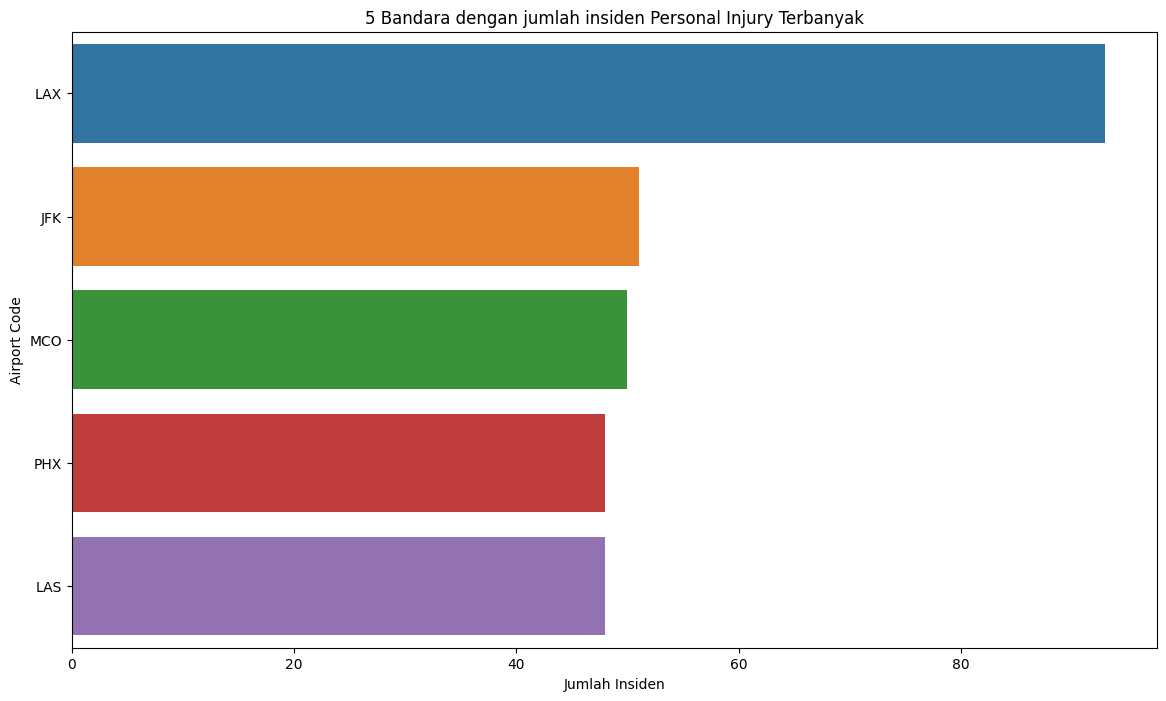

In [196]:
plt.figure(figsize=(14,8))
sns.barplot(data= df_personal_injury_by_airport, y = 'Airport Code', x = 'Jumlah Insiden', orient='horizontal')
plt.title('5 Bandara dengan jumlah insiden Personal Injury Terbanyak')
plt.show()

Insiden `Personal Injury` sebagian besar terjadi di bandara LAX yaitu **6,46%** dari total klaim, diikuti dengan `JFK`, `MCO`, `PHX`, `LAS` dengan persentase **~3%**.

##### Pesawat apa dengan insiden `Personal Injury` Terbanyak?

Akan ditinjau pesawat yang mengalami insiden `Personal Injury` melalui kolom `Airline Name`.

In [197]:
df_personal_injury_by_airline = df_personal_injury.groupby('Airline Name')['Claim Number'].count().to_frame().reset_index()
df_personal_injury_by_airline = df_personal_injury_by_airline.rename(columns={'Claim Number':'Jumlah Insiden'})
df_personal_injury_by_airline['Persentase'] = df_personal_injury_by_airline['Jumlah Insiden']/sum(df_personal_injury_by_airline['Jumlah Insiden'])*100

df_personal_injury_by_airline = df_personal_injury_by_airline.sort_values('Jumlah Insiden', ascending=False).head()
df_personal_injury_by_airline

,Airline Name,Jumlah Insiden,Persentase
47,Southwest Airlines,295,20.486111
25,Delta Air Lines,222,15.416667
14,American Airlines,212,14.722222
54,UAL,138,9.583333
57,USAir,115,7.986111


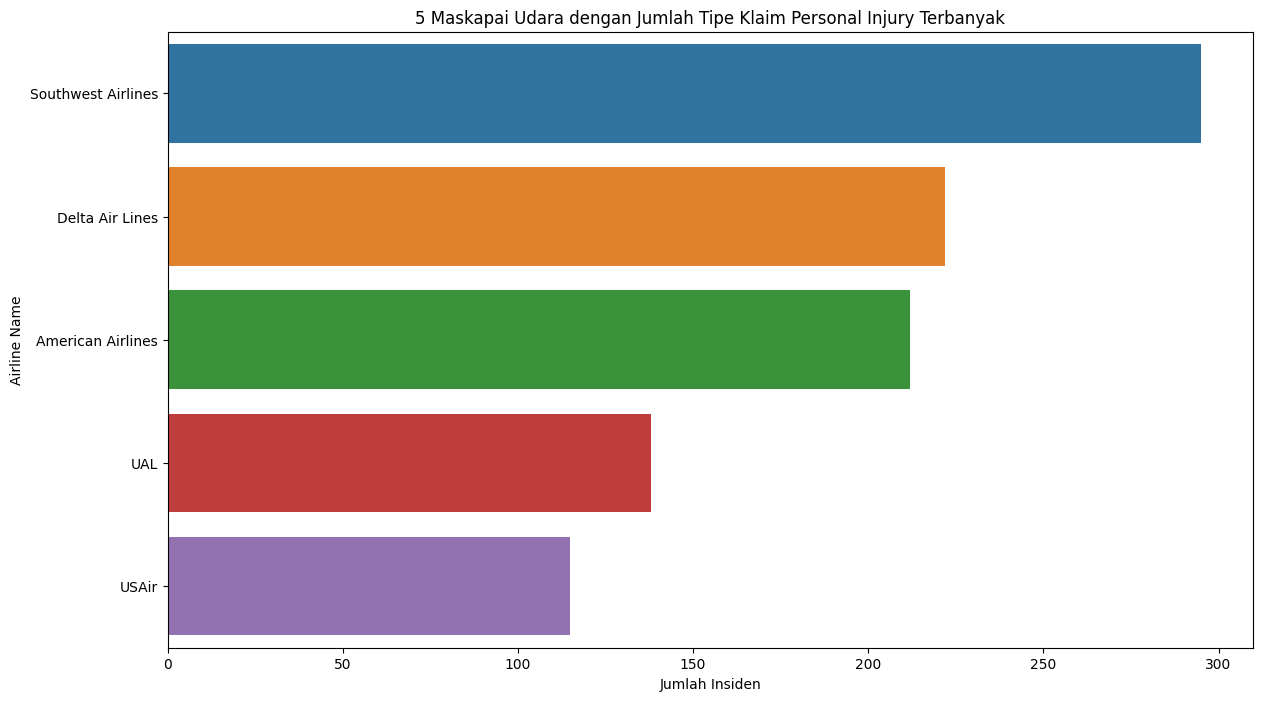

In [198]:
plt.figure(figsize=(14,8))
sns.barplot(data= df_personal_injury_by_airline, y = 'Airline Name', x = 'Jumlah Insiden', orient='horizontal')
plt.title('5 Maskapai Udara dengan Jumlah Tipe Klaim Personal Injury Terbanyak')
plt.show()

#### 3. Lokasi site klaim mana yang memiliki jumlah pembayaran rata-rata tertinggi?

Akan ditinjau lokasi site klaim tertinggi yang dibayarkan melalui kolom `Claim Site`.

##### `Claim Site` Tertinggi

In [199]:
df_approve_settle.groupby('Claim Site').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Site,,,,,,,,
Bus Station,1.0,200.000000,NaN,200.0,200.00,200.0000,200.000,200.0
Checked Baggage,60197.0,137.756788,305.943170,0.0,27.50,59.5000,142.380,15000.0
Checkpoint,19238.0,267.053507,1180.790262,0.0,49.83,105.6025,250.000,106000.0
Motor Vehicle,253.0,2022.773202,8104.267085,22.5,435.47,887.7200,1494.000,125000.0
Other,726.0,288.750365,782.514790,0.0,50.00,103.0300,227.335,12500.0


In [200]:
print(f'Rata-rata Close Amount berdasarkan Claim Site untuk Disposition Approve / Settle:')
for i in df_approve_settle['Claim Site'].unique():
    mean = df_approve_settle[df_approve_settle['Claim Site'] == i]['Close Amount'].mean()
    print(f'{i}: {mean}')

Rata-rata Close Amount berdasarkan Claim Site untuk Disposition Approve / Settle:
Checked Baggage: 137.75678821203715
Checkpoint: 267.0535068614201
Motor Vehicle: 2022.7732015810275
Other: 288.75036501377406
Bus Station: 200.0


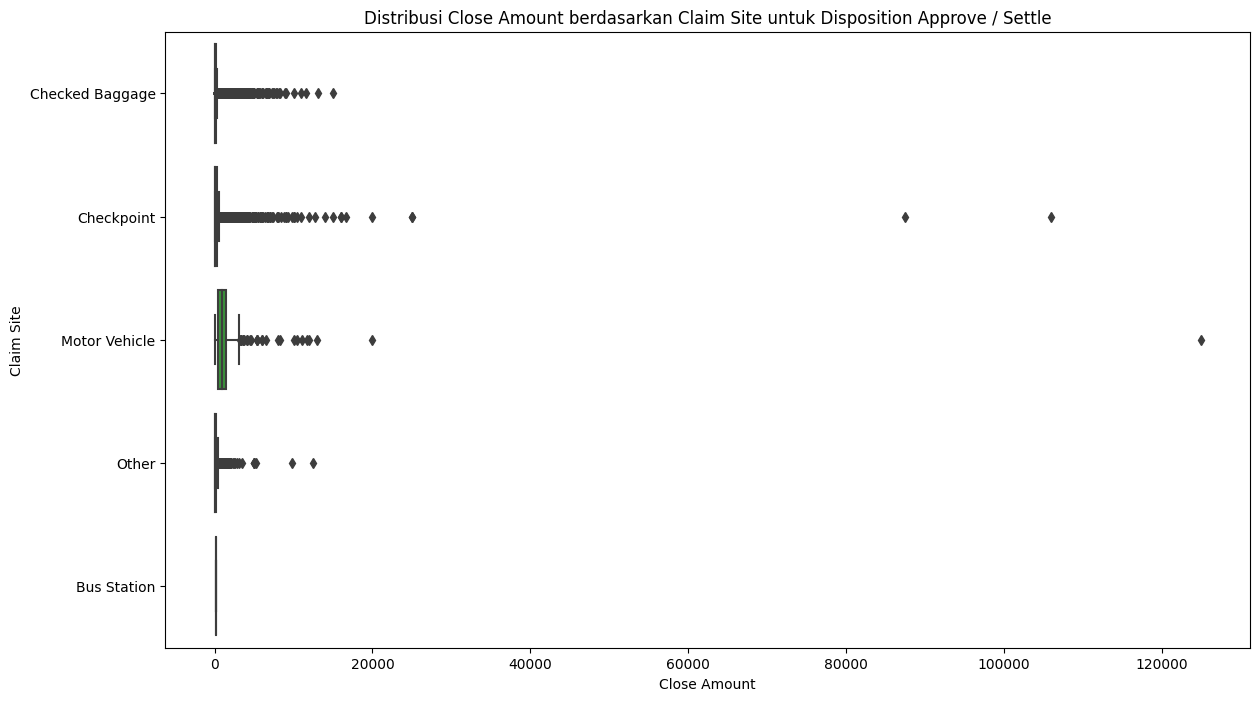

In [201]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df_approve_settle, y='Claim Site', x='Close Amount')
plt.title('Distribusi Close Amount berdasarkan Claim Site untuk Disposition Approve / Settle')
plt.show()

**Uji Hipotesis**

Sama seperti `Claim Type`, berdasarkan [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), rata-rata distribusi sampel mendekati distribusi normal jika ukuran sampel sama dengan atau lebih besar dari 30. Itu sebabnya kami memilih untuk menggunakan [ANOVA](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/):
* **H0**: Semua jenis klaim memiliki rata-rata jumlah yang hampir sama<br>
* **H1**: Setidaknya satu jenis klaim memiliki rata-rata jumlah dekat yang berbeda

In [202]:
claim_site = df['Claim Site'].unique()
stats, pvalue = f_oneway(*[df_approve_settle[df_approve_settle['Claim Site'] == i]['Close Amount'] for i in claim_site])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. 
    Terima H0
    ''')
else:
    print(f'''
    pvalue = {pvalue}.
    Tolak H0
    ''')


    pvalue = 0.0.
    Tolak H0
    


Klaim yang terjadi di **Motor Vehicle** memiliki jumlah rata-rata tertinggi yang dibayarkan **$2,003**. Hal ini dibuktikan dengan uji ANOVA bahwa paling tidak ada satu site klaim memiliki rata-rata `Close Amount` yang berbeda. Sama seperti `Claim Type`, insiden yang terjadi di site klaim ini jarang terjadi tetapi jumlah yang dibayarkan sangat berbeda dengan situs klaim lainnya.


Dari grafik boxplot diatas, didapati bahwa outlier memang [True Outlier](https://godatadrive.com/blog/outliers-101#:~:text=True%20Outlier%3A%20Outliers%20that%20are,many%20reasons%20behind%20their%20existence.). Jika dilihat dari persebaran data nya, masuk akal jika `Personal Injury` memiliki `Close Amount` yang lebih tinggi. Oleh karena itu, untuk analisis ini akan digunakan **Rata-rata** agar dapat mewakili karakteristik sebenarnya dari dataset.

##### Kapan sebagian besar insiden `Motor Vehicle` terjadi?

Sebelumnya, kita buat df untuk site klaim `Motor Vehicle`.

In [203]:
df_motor_vehicle = df[df['Claim Site'] == 'Motor Vehicle']

Kemudian kita hitung rata-rata insiden di site klaim `Motor Vehicle` setiap bulan.

In [204]:
df_trend_motor_vehicle = df_motor_vehicle.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
df_trend_motor_vehicle = df_trend_motor_vehicle.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
df_trend_motor_vehicle['Month Number'] = df_trend_motor_vehicle['Month'].dt.month
df_trend_motor_vehicle['Month'] = df_trend_motor_vehicle['Month'].astype('str')

df_trend_month_motor_vehicle = df_trend_motor_vehicle.groupby('Month Number')['Number of Incidents'].mean().to_frame().reset_index()
df_trend_month_motor_vehicle = df_trend_month_motor_vehicle.rename(columns={'Month Number': 'Month'})

df_trend_month_motor_vehicle.sort_values('Number of Incidents',ascending=False)

,Month,Number of Incidents
7,8,5.583333
0,1,4.153846
8,9,3.666667
4,5,3.636364
11,12,3.461538
5,6,3.416667
6,7,3.333333
3,4,3.250000
2,3,3.200000
10,11,3.200000


Kemudian kita buat line plot untuk melihat trend nya.

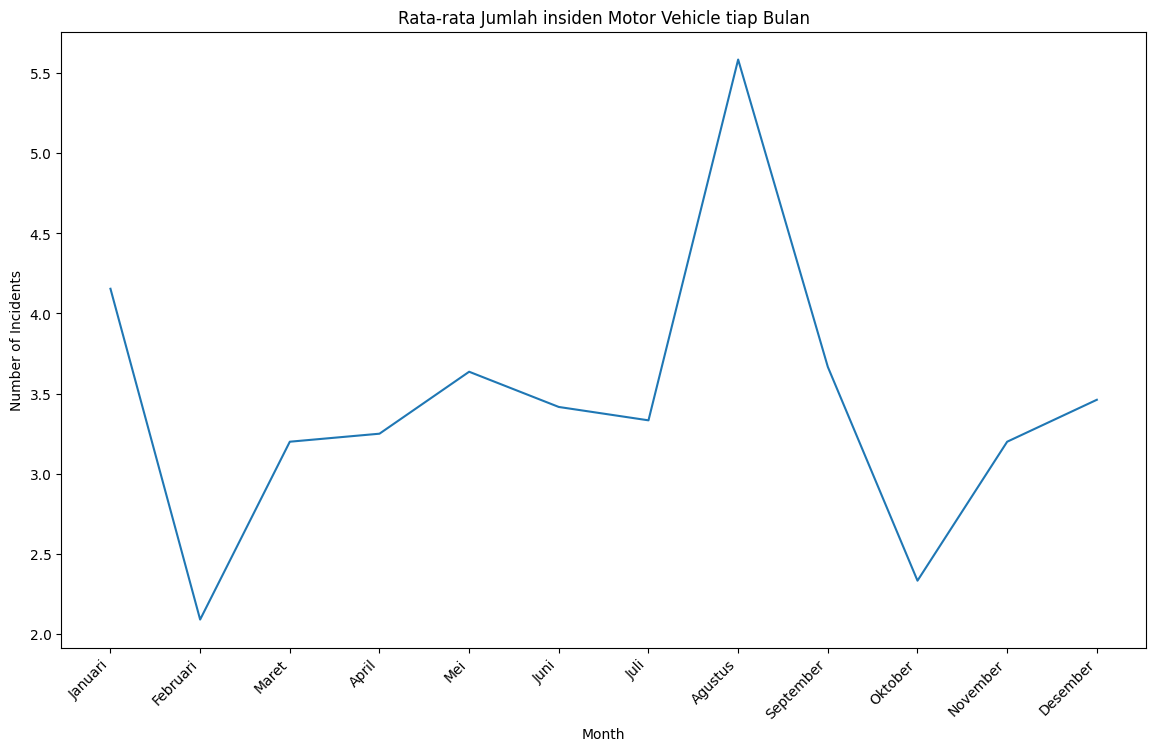

In [205]:
plt.figure(figsize=(14,8))
sns.lineplot(data= df_trend_month_motor_vehicle, x = 'Month', y = 'Number of Incidents')
plt.xticks(range(1,13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli','Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation= 45, ha = 'right')
plt.title('Rata-rata Jumlah insiden Motor Vehicle tiap Bulan')
plt.show()

Insiden di site klaim `Motor Vehicle` sebagian besar terjadi pada **Agustus** dengan rata-rata insiden **5,58 kali**. Bulan paling langka dengan insiden situs klaim `Motor Vehicle` adalah **Februari** dan **Oktober** dengan rata-rata insiden **~2**.

##### Di bandara mana sebagian besar insiden `Personal Injury` terjadi?

Akan ditinjau berdasarkan kolom `Airport Code`. Dimana kita akan langsung hitung persentase nya & plot menggunakan bar plot.

In [206]:
df_motor_vehicle_by_airport_code = df_motor_vehicle.groupby(['Airport Code', 'Airport Name'])['Claim Number'].count().to_frame().reset_index()
df_motor_vehicle_by_airport_code = df_motor_vehicle_by_airport_code.rename(columns={'Claim Number':'Jumlah Insiden'})
df_motor_vehicle_by_airport_code['Persentase'] = df_motor_vehicle_by_airport_code['Jumlah Insiden']/sum(df_motor_vehicle_by_airport_code['Jumlah Insiden'])*100

df_motor_vehicle_by_airport_code = df_motor_vehicle_by_airport_code.sort_values('Jumlah Insiden', ascending=False).head()
df_motor_vehicle_by_airport_code

,Airport Code,Airport Name,Jumlah Insiden,Persentase
62,ZZX,Non TSA Airport (motor vehicle),270,55.670103
22,I,Insurance Subrogation Claim,32,6.597938
60,TSA,TSA - Non-Specified Airport,31,6.391753
19,HDQ,Headquarters,12,2.474227
25,JFK,John F. Kennedy International,9,1.855670


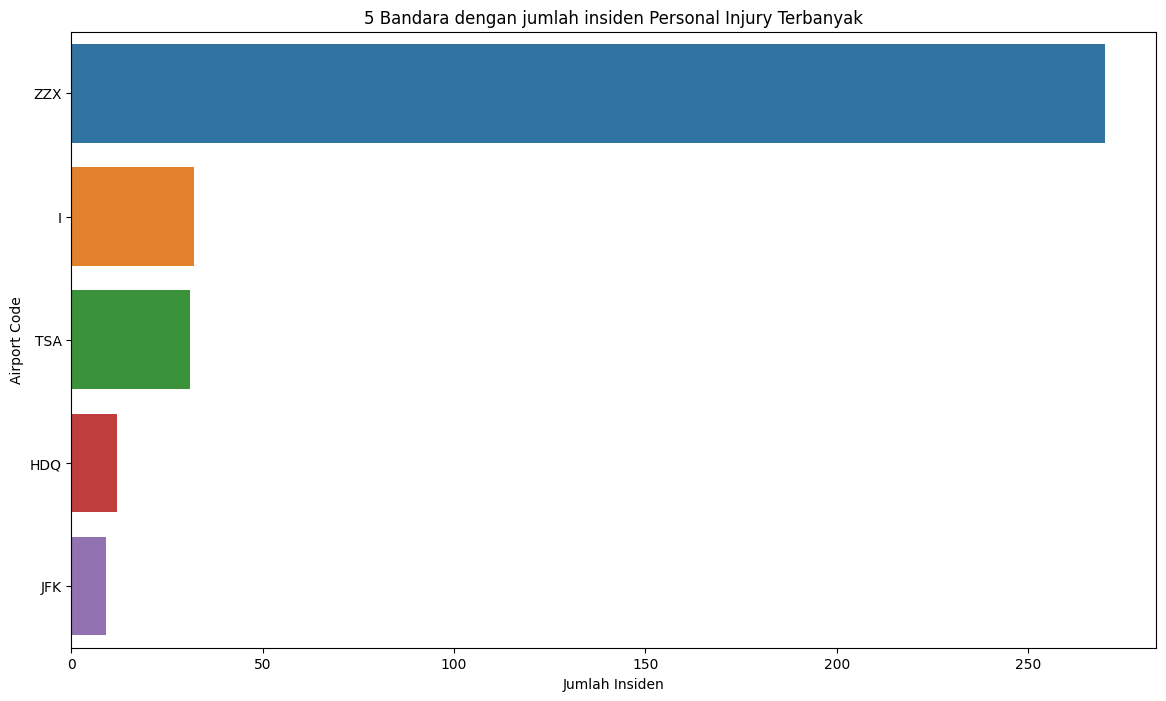

In [207]:
plt.figure(figsize=(14,8))
sns.barplot(data= df_motor_vehicle_by_airport_code, y = 'Airport Code', x = 'Jumlah Insiden', orient='horizontal')
plt.title('5 Bandara dengan jumlah insiden Personal Injury Terbanyak')
plt.show()

Sebagian besar insiden lokasi klaim `Motor Vehicle` terjadi di bandara **'ZZX'** atau **Bandara Non TSA (kendaraan bermotor)** yaitu **55,67%** dari jumlah insiden. Artinya, sebagian besar insiden lokasi klaim `Motor Vehicle` terjadi **di luar area bandara**.

#### `Claim Site` & `Claim Type`

Kemudian, kita lihat hubungan `Claim Site` dengan `Claim Type`.

In [208]:
df_motor_vehicle_by_claim_type = df_motor_vehicle.groupby(['Claim Type'])['Claim Number'].count().to_frame().reset_index()
df_motor_vehicle_by_claim_type = df_motor_vehicle_by_claim_type.rename(columns={'Claim Number':'Jumlah Insiden'})
df_motor_vehicle_by_claim_type['Persentase'] = df_motor_vehicle_by_claim_type['Jumlah Insiden']/sum(df_motor_vehicle_by_claim_type['Jumlah Insiden'])*100

df_motor_vehicle_by_claim_type = df_motor_vehicle_by_claim_type.sort_values('Jumlah Insiden', ascending=False).head()
df_motor_vehicle_by_claim_type

,Claim Type,Jumlah Insiden,Persentase
1,Motor Vehicle,339,69.896907
4,Personal Injury,67,13.814433
5,Property Damage,48,9.896907
0,Employee Loss (MPCECA),19,3.917526
2,Passenger Property Loss,10,2.061856


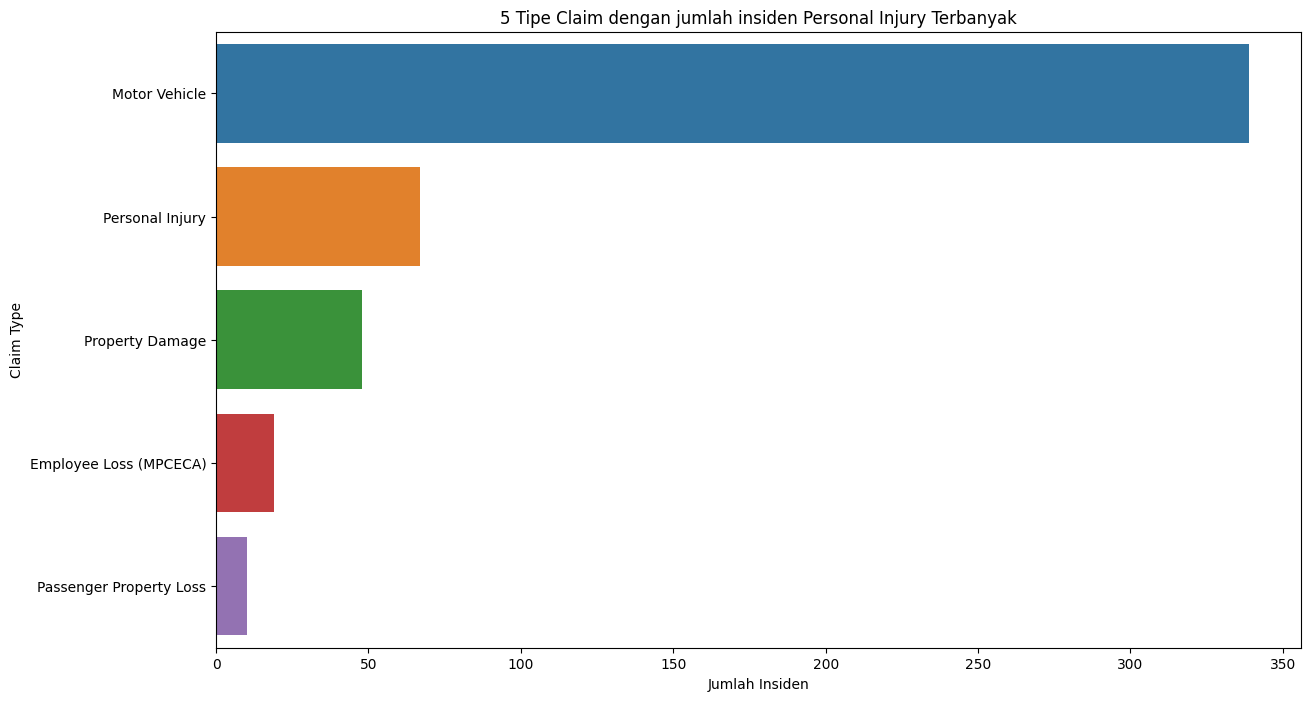

In [209]:
plt.figure(figsize=(14,8))
sns.barplot(data= df_motor_vehicle_by_claim_type, y = 'Claim Type', x = 'Jumlah Insiden', orient='horizontal')
plt.title('5 Tipe Claim dengan jumlah insiden Site Claim Motor Vehicle Terbanyak Terbanyak')
plt.show()

Jika diperhatikan, pada kolom `Claim Type` & `Claim Site` sama-sama memiliki value `Motor Vehicle`. Dimana ternyata di site klaim `Motor Vehicle`, tidak hanya insiden yang terjadi pada motor saja. Juga ada insiden `Personal Injury` & `Property Damage` yang menimpa penumpang.

#### 4. Item mana yang memiliki rata-rata jumlah pembayaran tertinggi?

Akan ditinjau tipe klaim tertinggi yang dibayarkan melalui kolom `Claim Type`.

In [210]:
item_close_amount = pd.DataFrame()
for i, j in item_dict.items():
    item = i
    median = df_approve_settle[df_approve_settle['Item'].str.contains(i)]['Close Amount'].median()
    mean = df_approve_settle[df_approve_settle['Item'].str.contains(i)]['Close Amount'].mean()
    max = df_approve_settle[df_approve_settle['Item'].str.contains(i)]['Close Amount'].max()
    min = df_approve_settle[df_approve_settle['Item'].str.contains(i)]['Close Amount'].min()
    baris = pd.DataFrame([[item, median, mean, max, min]], columns=['Item', 'Close Amount Median', 'Close Amount Mean', 'Close Amount Max', 'Close Amount Min'])
    item_close_amount = pd.concat([item_close_amount, baris], ignore_index= True)

item_close_amount = item_close_amount.sort_values('Close Amount Mean', ascending=False).head()
item_close_amount 


,Item,Close Amount Median,Close Amount Mean,Close Amount Max,Close Amount Min
2,Jewelry,150.00,384.371907,16000.0,0.0
10,Watches,100.00,276.534676,9000.0,0.0
7,Currency,100.00,211.098164,5000.0,0.0
12,Other,61.99,186.735747,125000.0,0.0
4,Electronic,108.53,141.563858,1250.0,3.0


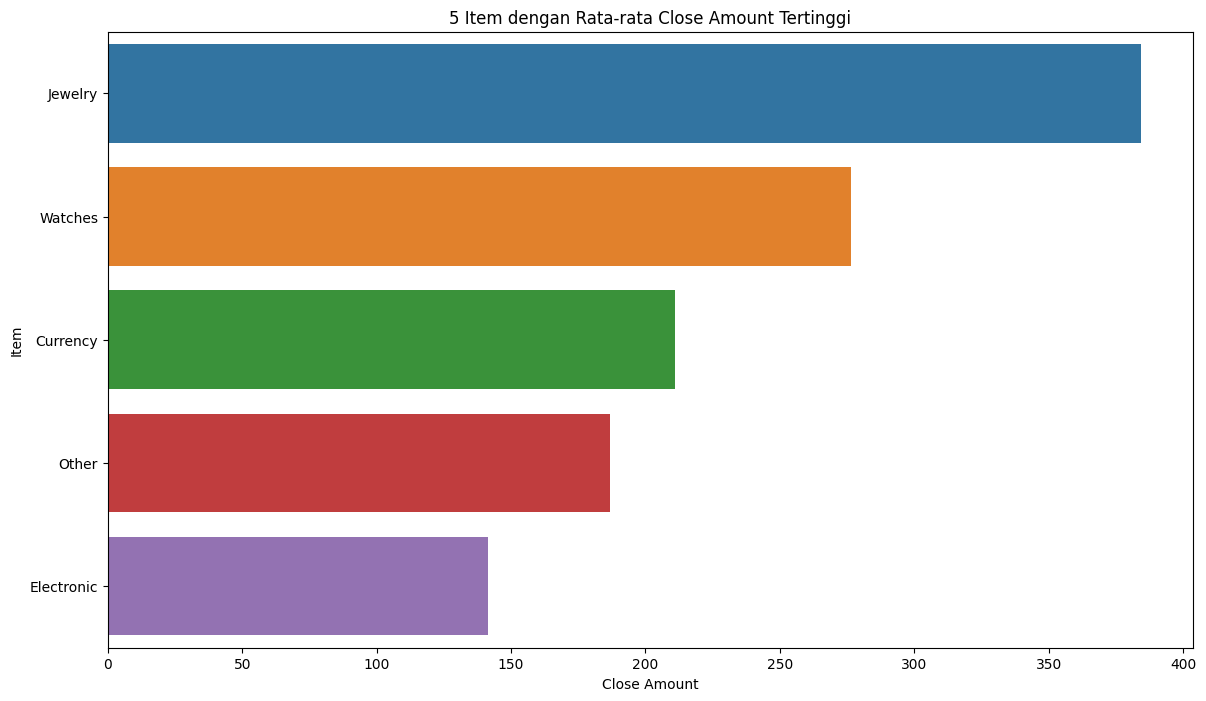

In [211]:
plt.figure(figsize=(14,8))
fig = sns.barplot(data= item_close_amount, y = 'Item', x = 'Close Amount Mean', orient='horizontal')
plt.xlabel('Close Amount')
plt.title('5 Item dengan Rata-rata Close Amount Tertinggi')

plt.show()

In [212]:
items = item_close_amount['Item'].unique()
stats, pvalue = f_oneway(*[df_approve_settle[df_approve_settle['Item'].str.contains(i)]['Close Amount'] for i in items])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. 
    Terima H0
    ''')
else:
    print(f'''
    pvalue = {pvalue}.
    Tolak H0
    ''')


    pvalue = 6.137413899692951e-21.
    Tolak H0
    


Item yang memiliki jumlah pembayaran tertinggi adalah **Perhiasan** (`Jewelry`) dengan rata-rata nilai **$384**, diikuti dengan **Jam** (`Watches`) & **Mata Uang** (`Currency`) Dengan nilai rata-rata masing-masing **$277** & **$211**. Hal ini dibuktikan dengan uji ANOVA bahwa paling tidak ada satu `Item` yang memiliki rata-rata `Close Amount` yang berbeda. 

Tren ini berbeda dengan tren frekuensi klaim yang diajukan, dimana didominasi oleh `Other`, `Accessories` & `Electronic`. Item `Jewelry`, `Watches`, dan `Currency` termasuk item yang mewah & berharga, sehingga memiliki nilai jual tinggi. Oleh karena itu, pastinya memiliki nilai ganti rugi `Close Amount` yang tinggi pula.

Sama seperti pada analisis `Claim Type` & `Claim Site`, masuk akal juga untuk kategori barang yang berbeda memiliki variasi dalam jumlah rata-rata yang dibayarkan. Barang yang lebih mewah pastinya memiliki harga yang lebih tinggi. Jadi, untuk analisis ini akan digunakan **Rata-rata** agar dapat mewakili karakteristik sebenarnya dari dataset.

### **Apakah Terdapat Error pada Sistem?**

Sesuai informasi yang termuat dalam dataset, seharusnya klaim yang memiliki kriteria:
1. `Disposition` yang memiliki value `Approve in Full`, seharusnya nilai `Close Amount` sama dengan `Claim Amount`
2. `Disposition` memiliki value `Deny`, seharusnya nilai `Close Amount` sama dengan 0

Untuk melakukan uji ini, kita gunakan `raw_data` (df **sebelum** dilakukan Inputing missing values & penghapusan outlier).

#### Raw Data Preparation

In [213]:
raw_data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [214]:
raw_data['Claim Amount'] = raw_data['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
raw_data['Close Amount'] = raw_data['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')

raw_data['Claim Amount'] = pd.to_numeric(raw_data['Claim Amount'])
raw_data['Close Amount'] = pd.to_numeric(raw_data['Close Amount'])

raw_data = raw_data.replace('-', np.nan)

C:\Users\ACER\AppData\Local\Temp\ipykernel_18428\1658687069.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw_data['Claim Amount'] = raw_data['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
C:\Users\ACER\AppData\Local\Temp\ipykernel_18428\1658687069.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw_data['Close Amount'] = raw_data['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')


In [215]:
raw_data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full


In [216]:
raw_data.describe()

,Claim Amount,Close Amount
count,2.002240e+05,135315.000000
mean,1.507122e+07,98.293415
std,6.704474e+09,925.832118
min,0.000000e+00,0.000000
25%,1.500000e+01,0.000000
50%,1.000000e+02,0.000000
75%,3.200000e+02,70.000000
max,3.000000e+12,250000.000000


In [217]:
raw_data = raw_data.drop(raw_data[raw_data['Claim Amount'].isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data['Close Amount'].isnull()].index)

In [218]:
raw_data.describe()

,Claim Amount,Close Amount
count,1.340070e+05,134007.000000
mean,2.247304e+07,98.746021
std,8.195179e+09,930.192042
min,0.000000e+00,0.000000
25%,6.359000e+01,0.000000
50%,1.750000e+02,0.000000
75%,4.540600e+02,70.000000
max,3.000000e+12,250000.000000


In [219]:
raw_data['Disposition'].value_counts()

Deny               66738
Approve in Full    34672
Settle             27749
Name: Disposition, dtype: int64

In [220]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134007 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   134007 non-null  object 
 1   Date Received  133897 non-null  object 
 2   Incident Date  133683 non-null  object 
 3   Airport Code   129993 non-null  object 
 4   Airport Name   129993 non-null  object 
 5   Airline Name   105671 non-null  object 
 6   Claim Type     128539 non-null  object 
 7   Claim Site     133724 non-null  object 
 8   Item           130774 non-null  object 
 9   Claim Amount   134007 non-null  float64
 10  Status         134007 non-null  object 
 11  Close Amount   134007 non-null  float64
 12  Disposition    129159 non-null  object 
dtypes: float64(2), object(11)
memory usage: 14.3+ MB


#### `Disposition` yang memiliki value `Approve in Full`

In [221]:
raw_data[raw_data['Disposition']=='Approve in Full'].shape[0]

34672

In [222]:
raw_data_approve_cek = raw_data[raw_data['Disposition']=='Approve in Full']
raw_data_approve_cek.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00,Approve in Full


In [223]:
raw_data_approve_cek_ok = raw_data_approve_cek[raw_data_approve_cek['Claim Amount']==raw_data_approve_cek['Close Amount']]
raw_data_approve_cek_ok.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00,Approve in Full


In [224]:
raw_data_approve_cek_ok.shape[0]/raw_data_approve_cek.shape[0]

0.9730329949238579

In [225]:
amount = raw_data.loc[(raw_data['Disposition']=='Approve in Full')]

df_amount = pd.DataFrame({
    'NO' : amount['Close Amount'],
    'YES': amount['Claim Amount']
})

df_amount['diff_amount'] = df_amount['YES'] - df_amount['NO']
df_amount.head()


,NO,YES,diff_amount
0,350.00,350.00,0.0
3,50.00,50.00,0.0
4,84.79,84.79,0.0
6,106.52,106.52,0.0
7,75.00,75.00,0.0


**Uji Hipotesis**

Untuk menguji apakah terdapat perbedaan antara nilai `Claim Amount` & `Close Amount` pada `Disposition` dengan value `Approve in Full`, akan digunakan metode [Wilcoxon](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test). Metode ini digunakan untuk meguji 2 nilai yang berpasangan untuk data yang tidak terdistribusi normal. 

In [226]:
sumrank, pvalue = wilcoxon(df_amount['diff_amount'], alternative ='two-sided', correction=True)

print('p_value : ', pvalue)
print(sumrank)

if pvalue < 0.05 :
    print('Tolak H0')
else :
    print('Terima H0')

p_value :  4.9436981791550544e-23
137160.0
Tolak H0


Hasil dari ujinnya ditemukan bahwa nilai p-value kurang dari 0,05. Dimana berarti bahwa nilai `Claim Amount` berbeda dengan `Close Amount`. Hal ini menunjukkan ada kemungkinan terjadi kesalahan sistem.

In [227]:
amount[['Close Amount','Claim Amount']].sum()

Close Amount    5228954.18
Claim Amount    5264044.86
dtype: float64

In [228]:
amount[['Close Amount','Claim Amount']].corr(method = 'spearman')

,Close Amount,Claim Amount
Close Amount,1.000000,0.993265
Claim Amount,0.993265,1.000000


#### `Disposition` yang memiliki value `Deny`

In [229]:
raw_data_deny_cek = raw_data[raw_data['Disposition']=='Deny']
raw_data_deny_cek.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
15,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.0,Deny
16,15324,12-Jul-02,6/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.0,Denied,0.0,Deny
17,15361,15-Jul-02,3/11/2002 0:00,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.0,Denied,0.0,Deny
19,0714534M,22-Jul-02,3/6/2002 0:00,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.0,Denied,0.0,Deny
32,17201,9-Sep-02,8/19/2002 0:00,PVD,TF Green Airport; Providence,Delta Air Lines,NaN,Other,Other,250.0,Denied,0.0,Deny


In [230]:
raw_data_deny_cek_ok = raw_data_deny_cek[raw_data_deny_cek['Close Amount']==0]
raw_data_deny_cek_ok.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
15,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.0,Deny
16,15324,12-Jul-02,6/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.0,Denied,0.0,Deny
17,15361,15-Jul-02,3/11/2002 0:00,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.0,Denied,0.0,Deny
19,0714534M,22-Jul-02,3/6/2002 0:00,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.0,Denied,0.0,Deny
32,17201,9-Sep-02,8/19/2002 0:00,PVD,TF Green Airport; Providence,Delta Air Lines,NaN,Other,Other,250.0,Denied,0.0,Deny


In [231]:
raw_data_deny_cek_ok.shape[0]/raw_data_deny_cek.shape[0]

0.9857802151697683

**Uji Hipotesis**

Untuk menguji apakah nilai `Close Amount` pada `Disposition` dengan value `Deny` sama dengan 0, akan digunakan metode [Wilcoxon](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test). Metode ini digunakan untuk meguji 2 nilai yang berpasangan untuk data yang tidak terdistribusi normal. 

In [232]:
amount = raw_data.loc[(raw_data['Disposition']=='Deny')]

df_amount = pd.DataFrame({
    'NO' : amount['Close Amount'],
    'YES': 0
})

df_amount['diff_amount'] = df_amount['YES'] - df_amount['NO']
df_amount.head()


,NO,YES,diff_amount
15,0.0,0,0.0
16,0.0,0,0.0
17,0.0,0,0.0
19,0.0,0,0.0
32,0.0,0,0.0


Hasil dari ujinnya ditemukan bahwa nilai p-value kurang dari 0,05. Dimana berarti bahwa nilai `Close Amount` tidak sama dengan 0. Hal ini menunjukkan ada kemungkinan terjadi kesalahan sistem.

In [233]:
sumrank, pvalue = wilcoxon(df_amount['diff_amount'], alternative ='two-sided', correction=True)

print('p_value : ', pvalue)
print(sumrank)

if pvalue < 0.05 :
    print('Tolak H0')
else :
    print('Terima H0')

p_value :  6.825320623162939e-157
0.0
Tolak H0


In [234]:
df.shape

(202230, 16)

<hr>

# **X. Kesimpulan & Rekomendasi**

<hr>

## **X.1 Kesimpulan**

**NEW!!!!!!!!!!!!!!!!!!!!!!**

Secara frekuensi klaim, karakteristik insiden yang diajukan terhadap TSA adalah:
1. Insiden TSA memiliki nilai **tertinggi** di tahun **2004** dengan jumlah insiden **28.727**. Setelah mencapai titik tertinggi, jumlah klaim kemudian mengalami tren menurun hingga mencapai titik paling rendah (kedua setelah tahun **2002**) pada tahun **2015**. Secara rata-rata, insiden cenderung banyak pada tengah tahun (**Juli** & **Agustus**) dan akhir tahun (**Desember**).
2. Berdasarkan bandara, insiden paling banyak terjadi di Bandara Internasional Los Angeles (LAX) dimana **8,93%** insiden, diikuti oleh JFK, FWR, ORD, MIA.
3. Penumpang pesawat **American Airlines** menjadi yang paling banyak mengalami insiden TSA, yaitu **17,82%** dari total keseluruhan insiden, diikuti **Delta Air Lines**, **Soutwest Airlines**, dan **UAL**.
4. Klaim yang diajukan sangat didominasi oleh 2 tipe saja, yaitu `Passenger Property Loss` & `Property Damage` dimana memiliki persentase sebesar **98,61%** dari total klaim.
5. Sebagian besar insiden terjadi di site klaim `Checked Baggage` & `Checkpoint` dengan total persentase **98,35%**.
6. Selain kategori `Other`, barang yang paling banyak di klaim adalah `Accessories` & `Electronic` dengan persentase masing-masing **21,69%** & **20,58%**.
7. Hampir setengah klaim (**47,39%**) ditolak. Kemudian yang diterima **23,24%** & yang disesuaikan **16,53%**. Jumlah klaim yang disetujui/diselesaikan tertinggi di **2004** dan terus menurun hingga **2009**. Kemudian, jumlah klaim yang disetujui atau diselesaikan cenderung **stabil** hingga tahun **2015**.

Ciri-ciri klaim yang memiliki jumlah pembayaran lebih tinggi menurut rata-rata `Close Amount` adalah:
1. Klaim yang terjadi di **Motor Vehicle** memiliki jumlah rata-rata tertinggi yang dibayarkan, sebesar **$2003**.
2. tipe klaim `Personal Injury` memiliki jumlah rata-rata tertinggi klaim yang dibayarkan sebesar **$3614**, diikuti oleh `Motor Vehicle` dengan **$1232**.
3. Item yang memiliki jumlah pembayaran kalim tertinggi adalah **Perhiasan** (`Jewelry`) dengan rata-rata nilai **$384**, diikuti dengan **Jam** (`Watches`) & **Mata Uang** (`Currency`) Dengan nilai rata-rata masing-masing **$277** & **$211**.


Kemungkinan terjadi kesalahan sistem, karena:
1. Ketika Disposition memiliki value `Approve in Full`, nilai `Close Amount` tidak sama dengan `Claim Amount`.
2. Ketika Disposition memiliki value `Deny`, nilai `Close Amount` tidak sama dengan 0.


<hr>

## **X.2 Rekomendasi**

Berikut beberapa rekomendasi TSA dapat meningkatkan layanan mereka untuk menurunkan jumlah klaim, menurunkan biaya klaim, dan memperbaiki sistem:
1. Mengurangi frekuensi jumlah klaim<br>
     - Lebih fokus pada peningkatan pelayanan `Checked Baggage` & `Checkpoint`. Berikan lebih banyak pelatihan tentang pengecekan bagasi & pengecekan penumpang pada checkpoint. Lebih ditingkatkan kompetensi agen TSA dengan menjunjung tinggi profesionalitas & integritas agar memberikan pelayanan terbaik dengan tidak membuat barang bawaan penumpang hilang ataupun rusak. Kemudian juga perlu diterapkan sanksi berat kepada agen TSA yang bekerja melanggar SOP. Perlu juga dipasang CCTV lebih banyak untuk pemantauan keamanan.
     - Menyarankan penumpang untuk meningkatkan keamanan untuk bagasi dengan memasang pengamanan lebih seperti kunci gembok ganda untuk meminimalisir kehilangan harta benda.
     - Sarankan penumpang untuk membawa barang berharga seperti perhiasan, jam, dan uang mereka di tas jinjing daripada di bagasi.
     - Memperketat pengamanan TSA di liburan tengah tahun dan akhir tahun.
     - TSA dapat berfokus pada Bandara Internasional `Los Angeles International Airport` untuk menurunkan insiden. Dimana bisa melakukan benchmark pada bandara `Hartsfield–Jackson Atlanta International Airport` yang merupakan bandara tersibuk di dunia, namun insiden TSA nya cenderung lebih sedikit.

2. Mengurangi jumlah klaim dengan jumlah pembayaran yang lebih tinggi
     - Lebih memperhatikan penanganan penumpang dan tidak menimbulkan `Personal Injury`, terutama pada bulan Agustus. Berikan lebih banyak pelatihan bagaimana menangani penumpang bermasalah, terutama di negara bagian California.
     - Meningkatkan pemeliharaan `Motor Vehicle`, khususnya pada bulan Agustus. Selidiki lebih lanjut apa yang terjadi di luar bandara yang dapat menyebabkan insiden kendaraan bermotor.
     - Menghimbau kepada penumpang untuk tidak menyimpan barang-barang berharganya (seperti `Jewelry`) di dalam `Checked Baggage` dan meningkatkan pengamanan untuk mencegah hilangnya harta benda ()`Passenger Property Loss`).

3. Meningkatkan system input data claim TSA, agar data claim yang dianalisis dapat lebih akurat seperti:
    - Tidak dapat menggunakan special character pada `Claim Amount` dan `Close Amount`
    - Wajib mengisi seluruh kolom untuk meminimalisir missing values, tambahkan pilihan `not available` dan/atau `others` untuk menghindari kekosongan pengisian
    - Format pada `Incident Date` dan `Date Received` harus disamakan
    - Apabila kolom Disposition memiliki value `Deny`, maka secara otomatis close amount akan bernilai 0
    - Apabila kolom Disposition memiliki value`Approve in Full`, maka secara otomatis `Close Amount` akan bernilai sama dengan `Claim Amount`
    - Menambahkan kategori barang agar kategori `Other` tidak terlalu banyak